This Exam Question 3

1.

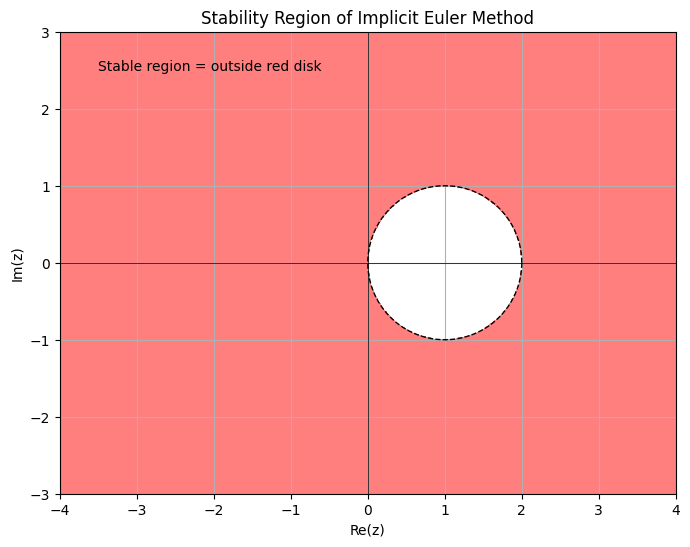

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid in the complex plane
x = np.linspace(-4, 4, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Amplification factor for implicit Euler: G(z) = 1 / (1 - z)
G = 1 / (1 - Z)
amplification = np.abs(G)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, amplification <= 1, levels=1, colors=["white", "red"], alpha=0.5)

# Reference: Unit circle centered at (1, 0)
theta = np.linspace(0, 2 * np.pi, 300)
circle_x = 1 + np.cos(theta)
circle_y = np.sin(theta)
plt.plot(circle_x, circle_y, 'k--', linewidth=1)

# Axis settings
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Stability Region of Implicit Euler Method")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.xlim([-4, 4])
plt.ylim([-3, 3])
plt.grid(True)
plt.gca().set_aspect('equal')
plt.text(-3.5, 2.5, "Stable region = outside red disk", fontsize=10)

plt.show()


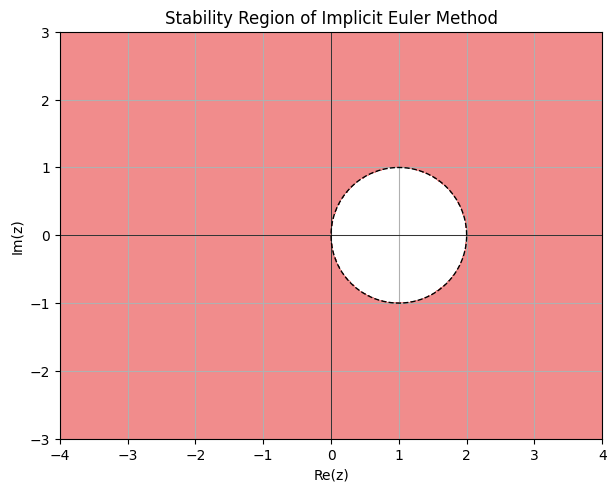

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid in the complex plane
x = np.linspace(-4, 4, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Amplification factor for implicit Euler: G(z) = 1 / (1 - z)
G = 1 / (1 - Z)
amplification = np.abs(G)

# Plotting
plt.figure(figsize=(7, 6))
plt.contourf(X, Y, amplification <= 1, levels=1, colors=["white", "lightcoral"], alpha=0.9)

# Unit circle centered at (1, 0)
theta = np.linspace(0, 2 * np.pi, 300)
circle_x = 1 + np.cos(theta)
circle_y = np.sin(theta)
plt.plot(circle_x, circle_y, 'k--', linewidth=1)

# Axes and labels
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Stability Region of Implicit Euler Method")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.xlim([-4, 4])
plt.ylim([-3, 3])
plt.grid(True)
plt.gca().set_aspect('equal')

plt.show()


2.

In [3]:
def implicit_euler_fixed_step(fun_jac, ta, tb, N, xa, *args):
    # Compute step size and allocate memory
    dt = (tb - ta) / N
    nx = xa.shape[0]
    X = np.zeros((N + 1, nx))
    T = np.zeros(N + 1)

    # Tolerance and max iterations for Newton’s method
    tol = 1e-8
    maxit = 100

    # Initial conditions
    T[0] = ta
    X[0, :] = xa

    # Implicit Euler loop
    for k in range(N):
        f, _ = fun_jac(T[k], X[k, :], *args)
        T[k + 1] = T[k] + dt
        x_init = X[k, :] + dt * f  # Initial guess for Newton's method
        X[k + 1, :] = newtons_method_ode(fun_jac, T[k], X[k], dt, x_init, tol, maxit, *args)

    return T, X

def newtons_method_ode(fun_jac, t, x, dt, x_init, tol, maxit, *args):
    
    x_new = x_init
    for _ in range(maxit):
        f, J = fun_jac(t + dt, x_new, *args)
        F = x_new - x - dt * f  # Residual equation
        if np.linalg.norm(F) < tol:
            return x_new
        J_implicit = np.eye(len(x)) - dt * J  # Implicit Euler Jacobian
        delta_x = np.linalg.solve(J_implicit, -F)  # Solve Newton step
        x_new += delta_x  # Update solution
    return x_new  # Return last computed valu

3.

In [4]:
import numpy as np

def implicit_euler_adaptive_step(fun_jac, t0, tf, x0,h0,abstol, reltol, *args):
    # Error controller parameters
    epstol=0.8
    facmin = 0.1  # Maximum decrease factor
    facmax = 5.0  # Maximum increase factor
    # Compute step size and allocate memory
    
    nx = x0.shape[0]
    X = np.zeros((N + 1, nx))
    T = np.zeros(N + 1)
    
    # Tolerance and max iterations for Newton’s method
    tol = 1e-8
    maxit = 100

    # Initial conditions
    t= t0
    x = np.array(x0, dtype=float)
    h = h0
   
  # Counters
    nfun = 0
    naccept = 0
    nreject = 0

    # Output storage
    T = np.array([t])  # Ensure T is a 1D NumPy array
    X = np.array([x])  # Ensure X is a 2D NumPy array

        # Algorithm
    while t < tf:
        if t + h > tf:
            h = tf - t

        f, J = fun_jac(t, x, *args)

        AcceptStep = False

        while not AcceptStep:
            
            #TODO: should f be calulated inside or outside of this loop
            x1_init = x + h * f
            x1 = newtons_method_ode(fun_jac, t, x, h, x1_init, tol, maxit, *args) 


            #half step
            hm = 0.5 * h
            tm = t + hm
            xm_init = x + hm * f


            xm = newtons_method_ode(fun_jac, tm, x, hm, xm_init, tol, maxit, *args)
            
            
            
            #to step final solution
            fm, _ = fun_jac(t, x, *args)
            x1hat = xm + hm * fm

            x1hat_final = newtons_method_ode(fun_jac, tm, xm, hm, x1hat, tol, maxit, *args)

            # Error estimation
            e = x1hat_final - x1
            denom = np.maximum(abstol, np.abs(x1hat) * reltol)  # Fix element-wise max
            
            r = np.max(np.abs(e) / denom)  # Compute max ratio

            AcceptStep = r <= epstol

            if AcceptStep:
                t = t + h
                x = x1hat

                naccept += 1
                T = np.append(T, t)  # Append t to the 1D array
                X = np.vstack([X, x1hat.reshape(1, -1)])  # Ensure correct shape
            else:
                nreject += 1

            h = np.max([facmin, np.min([np.sqrt(epstol / r), facmax])]) * h


    return (T,X),nreject


4.

In [6]:
from project.models import PreyPredator, VanDerPol, CSTR3, CSTR1
from project.solver import adaptive_dopri54
import numpy as np

In [ ]:
#need plots of different settings
#include ode45 and ode15s in the plots
#should I include it in the plots or just comment on it?
# Initial Conditions


Van der pool

In [ ]:
y0 = np.array([2.0, 0])
t0, tf = 0, 30

# Instantiate and Solve
solver = DOPRI54(lambda t, y: VanDerPol(t, y))

Prey pred

In [7]:
models = [PreyPredator(), VanDerPol(), CSTR3(), CSTR1()]
for model in models:
    print(f"\nRunning on {model.__class__.__name__}")
    x0 = model.x0
    t0 = model.t0
    tf = model.tf

    # Adaptive
    (T_adapt, X_adapt), nreject = implicit_euler_adaptive_step(
        model.fun_jac, t0, tf, x0, h0=0.1, abstol=1e-6, reltol=1e-3
    )
    print(f"Adaptive step: {len(T_adapt)} steps, {nreject} rejected")

    # Fixed step
    N = 100
    T_fixed, X_fixed = implicit_euler_fixed_step(
        model.fun_jac, t0, tf, N, x0
    )
    print(f"Fixed step: {len(T_fixed)} steps")


TypeError: PreyPredator() missing 2 required positional arguments: 't' and 'x'

In [9]:
# Redefine initial conditions for this scope
C0 = np.array([3.4, 3.7, 200])  # for CSTR3
T0 = 273.15  

In [11]:
import numpy as np

def newtons_method_ode(fun_jac, t, x, dt, x_init, tol, maxit, *args):
    x = np.atleast_1d(x)
    x_new = np.atleast_1d(x_init)
    for _ in range(maxit):
        f, J = fun_jac(t + dt, x_new, *args)
        F = x_new - x - dt * f
        if np.linalg.norm(F) < tol:
            return x_new
        J_implicit = np.eye(len(x)) - dt * J
        delta_x = np.linalg.solve(J_implicit, -F)
        x_new += delta_x
    return x_new

def implicit_euler_adaptive_step(fun_jac, t0, tf, x0, h0, abstol, reltol, *args):
    epstol = 0.8
    facmin = 0.1
    facmax = 5.0
    tol = 1e-8
    maxit = 100

    t = t0
    x = np.atleast_1d(np.array(x0, dtype=float))
    h = h0

    T = [t]
    X = [x.copy()]
    naccept, nreject = 0, 0

    while t < tf:
        if t + h > tf:
            h = tf - t

        f, _ = fun_jac(t, x, *args)

        AcceptStep = False
        while not AcceptStep:
            x1_init = x + h * f
            x1 = newtons_method_ode(fun_jac, t, x, h, x1_init, tol, maxit, *args)

            hm = 0.5 * h
            tm = t + hm
            xm_init = x + hm * f
            xm = newtons_method_ode(fun_jac, tm, x, hm, xm_init, tol, maxit, *args)

            fm, _ = fun_jac(tm, xm, *args)
            x1hat = xm + hm * fm
            x1hat_final = newtons_method_ode(fun_jac, tm, xm, hm, x1hat, tol, maxit, *args)

            e = x1hat_final - x1
            denom = np.maximum(abstol, np.abs(x1hat_final) * reltol)
            r = np.max(np.abs(e) / denom)

            AcceptStep = r <= epstol
            if AcceptStep:
                t += h
                x = x1hat_final
                T.append(t)
                X.append(x.copy())
                naccept += 1
            else:
                nreject += 1

            h *= max(facmin, min(np.sqrt(epstol / max(r, 1e-12)), facmax))

    return (np.array(T), np.vstack(X)), nreject

def implicit_euler_fixed_step(fun_jac, ta, tb, N, xa, *args):
    dt = (tb - ta) / N
    xa = np.atleast_1d(np.array(xa))
    nx = xa.shape[0]
    X = np.zeros((N + 1, nx))
    T = np.zeros(N + 1)

    tol = 1e-8
    maxit = 100

    T[0] = ta
    X[0, :] = xa

    for k in range(N):
        f, _ = fun_jac(T[k], X[k, :], *args)
        T[k + 1] = T[k] + dt
        x_init = X[k, :] + dt * f
        X[k + 1, :] = newtons_method_ode(fun_jac, T[k], X[k], dt, x_init, tol, maxit, *args)

    return T, X


In [12]:
from project.models import PreyPredator_Fun_Jac,VanDerPol_Fun_Jac,CSTR3_Fun_Jac,CSTR1_Fun_Jac

test_cases = [
    ("PreyPredator", [10.0, 5.0], PreyPredator_Fun_Jac),
    ("VanDerPol", [2.0, 0.0], VanDerPol_Fun_Jac),
    ("CSTR3", C0, CSTR3_Fun_Jac),
    ("CSTR1", T0, CSTR1_Fun_Jac),
]


for name, x0, fun_jac in test_cases:
    print(f"\nRunning {name}...")

    # Adaptive
    try:
        (T_adapt, X_adapt), nreject = implicit_euler_adaptive_step(
            fun_jac, t0=0.0, tf=5.0, x0=np.array(x0), h0=0.1,
            abstol=1e-6, reltol=1e-3
        )
        print(f"{name} — Adaptive Euler: {len(T_adapt)} steps, {nreject} rejected")
    except Exception as e:
        print(f"{name} — Adaptive Euler FAILED: {e}")

    # Fixed
    try:
        T_fixed, X_fixed = implicit_euler_fixed_step(
            fun_jac, ta=0.0, tb=5.0, N=100, xa=np.array(x0)
        )
        print(f"{name} — Fixed Euler: {len(T_fixed)} steps")
    except Exception as e:
        print(f"{name} — Fixed Euler FAILED: {e}")





Running PreyPredator...
PreyPredator — Adaptive Euler: 234 steps, 398 rejected
PreyPredator — Fixed Euler: 101 steps

Running VanDerPol...
VanDerPol — Adaptive Euler: 66 steps, 19 rejected
VanDerPol — Fixed Euler: 101 steps

Running CSTR3...
CSTR3 — Adaptive Euler: 10 steps, 0 rejected
CSTR3 — Fixed Euler: 101 steps

Running CSTR1...
CSTR1 — Adaptive Euler: 5 steps, 0 rejected
CSTR1 — Fixed Euler: 101 steps


In [13]:
import matplotlib.pyplot as plt

def plot_results(name, T_adapt, X_adapt, T_fixed, X_fixed):
    X_adapt = np.atleast_2d(X_adapt)
    X_fixed = np.atleast_2d(X_fixed)

    num_states = X_adapt.shape[1]
    fig, axes = plt.subplots(num_states, 1, figsize=(8, 2.5 * num_states), sharex=True)

    if num_states == 1:
        axes = [axes]

    for i in range(num_states):
        axes[i].plot(T_adapt, X_adapt[:, i], label='Adaptive', lw=2)
        axes[i].plot(T_fixed, X_fixed[:, i], '--', label='Fixed', lw=1.5)
        axes[i].set_ylabel(f'State {i}')
        axes[i].legend()
        axes[i].grid(True)

    axes[-1].set_xlabel("Time")
    fig.suptitle(f"{name} – Implicit Euler Comparison", fontsize=14)
    plt.tight_layout()
    plt.show()



Running PreyPredator...
PreyPredator — Adaptive Euler: 234 steps, 398 rejected
PreyPredator — Fixed Euler: 101 steps


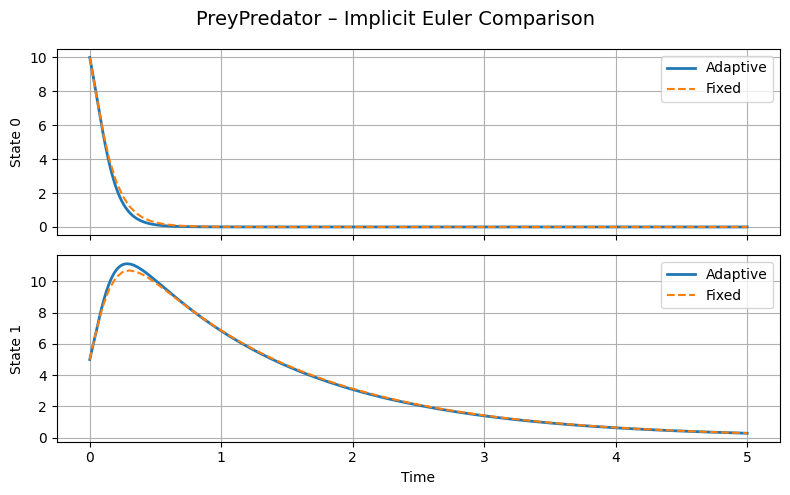


Running VanDerPol...
VanDerPol — Adaptive Euler: 66 steps, 19 rejected
VanDerPol — Fixed Euler: 101 steps


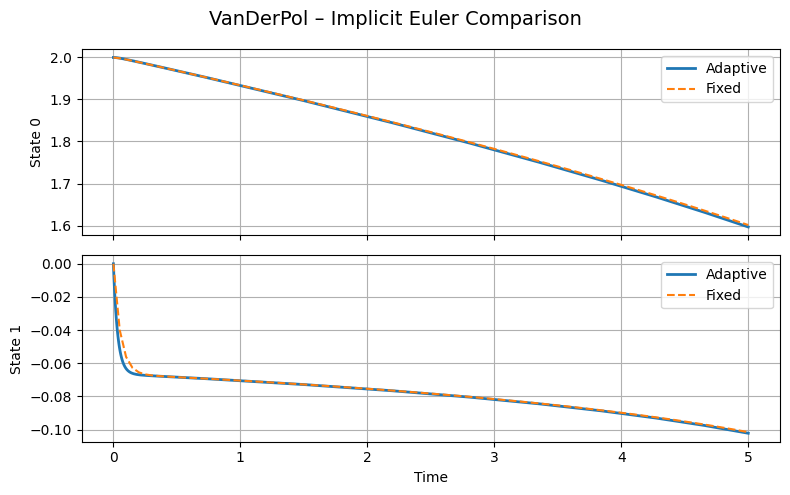


Running CSTR3...
CSTR3 — Adaptive Euler: 10 steps, 0 rejected
CSTR3 — Fixed Euler: 101 steps


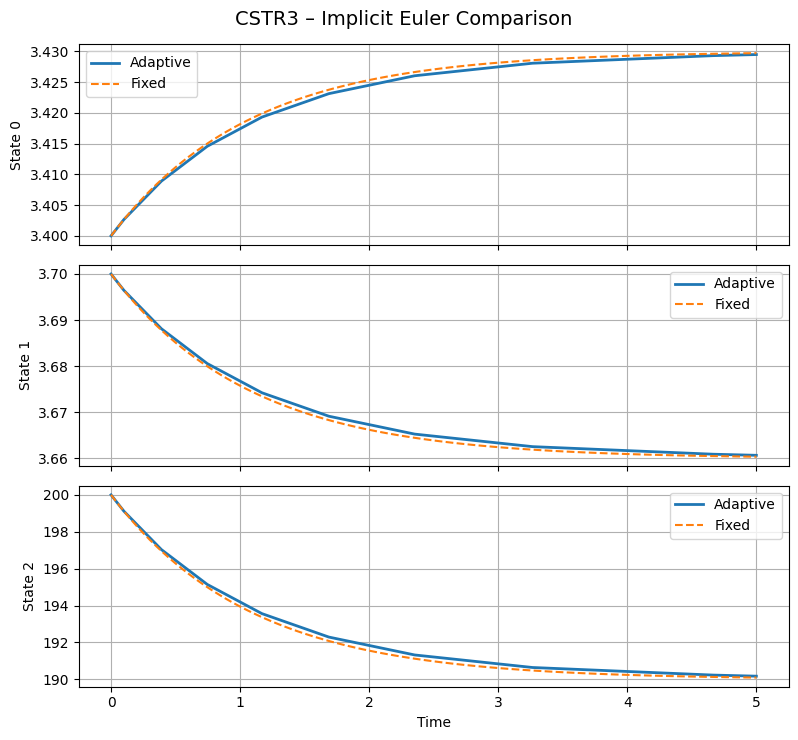


Running CSTR1...
CSTR1 — Adaptive Euler: 5 steps, 0 rejected
CSTR1 — Fixed Euler: 101 steps


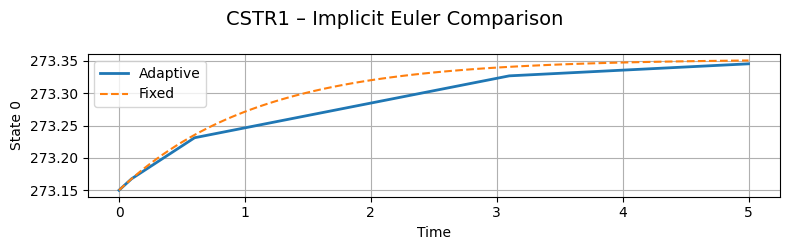

In [14]:
test_cases = [
    ("PreyPredator", [10.0, 5.0], PreyPredator_Fun_Jac),
    ("VanDerPol", [2.0, 0.0], VanDerPol_Fun_Jac),
    ("CSTR3", np.array([3.4, 3.7, 200]), CSTR3_Fun_Jac),
    ("CSTR1", np.array([273.15]), CSTR1_Fun_Jac),
]

for name, x0, fun_jac in test_cases:
    print(f"\nRunning {name}...")

    try:
        (T_adapt, X_adapt), nreject = implicit_euler_adaptive_step(
            fun_jac, t0=0.0, tf=5.0, x0=x0, h0=0.1,
            abstol=1e-6, reltol=1e-3
        )
        print(f"{name} — Adaptive Euler: {len(T_adapt)} steps, {nreject} rejected")
    except Exception as e:
        print(f"{name} — Adaptive Euler FAILED: {e}")
        T_adapt, X_adapt = [], []

    try:
        T_fixed, X_fixed = implicit_euler_fixed_step(
            fun_jac, ta=0.0, tb=5.0, N=100, xa=x0
        )
        print(f"{name} — Fixed Euler: {len(T_fixed)} steps")
    except Exception as e:
        print(f"{name} — Fixed Euler FAILED: {e}")
        T_fixed, X_fixed = [], []

    if len(T_adapt) > 0 and len(T_fixed) > 0:
        plot_results(name, T_adapt, X_adapt, T_fixed, X_fixed)


Interisting, the adaptive looks worse for the CSTR1 for implicit euler ?


In [41]:
from scipy.integrate import solve_ivp


def plot_results_with_reference(name, fun_jac, x0, t_span):
    t0, tf = t_span
    x0 = np.atleast_1d(np.array(x0))

    # Define RHS and Jacobian from fun_jac
    def rhs(t, x):
        return fun_jac(t, x)[0]
    
    def jac(t, x):
        return fun_jac(t, x)[1]

    t_eval = np.linspace(t0, tf, 1000)

    # Reference solutions using solve_ivp
    sol_ode45 = solve_ivp(rhs, [t0, tf], x0, t_eval=t_eval, method='RK45', atol=1e-9, rtol=1e-7)
    sol_ode15s = solve_ivp(rhs, [t0, tf], x0, t_eval=t_eval, method='BDF', jac=jac, atol=1e-9, rtol=1e-7)

    # Our implicit solvers
    (T_adapt, X_adapt), _ = implicit_euler_adaptive_step(
        fun_jac, t0, tf, x0, h0=0.1, abstol=1e-6, reltol=1e-3
    )
    T_fixed, X_fixed = implicit_euler_fixed_step(fun_jac, t0, tf, 100, x0)

    # Ensure 2D format
    X_adapt = np.atleast_2d(X_adapt)
    X_fixed = np.atleast_2d(X_fixed)
    Y_ode45 = np.atleast_2d(sol_ode45.y).T
    Y_ode15s = np.atleast_2d(sol_ode15s.y).T

    num_states = X_adapt.shape[1]
    fig, axes = plt.subplots(num_states, 1, figsize=(8, 2.5 * num_states), sharex=True)

    if num_states == 1:
        axes = [axes]

    for i in range(num_states):
        axes[i].plot(T_adapt, X_adapt[:, i], label='Implicit Euler (adaptive)', lw=2)
        axes[i].plot(T_fixed, X_fixed[:, i], '--', label='Implicit Euler (fixed)', lw=1.5)
        axes[i].plot(sol_ode45.t, Y_ode45[:, i], ':', label='RK45 (ode45)', lw=1.5)
        axes[i].plot(sol_ode15s.t, Y_ode15s[:, i], '-.', label='BDF (ode15s)', lw=1.5)
        axes[i].set_ylabel(f'State {i}')
        axes[i].legend()
        axes[i].grid(True)

    axes[-1].set_xlabel("Time")
    fig.suptitle(f"{name} — Different Solvers", fontsize=14)
    plt.tight_layout()
    plt.show()


In [17]:
test_cases = [
    ("PreyPredator", [10.0, 5.0], PreyPredator_Fun_Jac),
    ("VanDerPol", [2.0, 0.0], VanDerPol_Fun_Jac),
    ("CSTR3", np.array([3.4, 3.7, 200]), CSTR3_Fun_Jac),
    ("CSTR1", np.array([273.15]), CSTR1_Fun_Jac),
]

for name, x0, fun_jac in test_cases:
    print(f"\nRunning {name}...")

    try:
        (T_adapt, X_adapt), nreject = implicit_euler_adaptive_step(
            fun_jac, t0=0.0, tf=5.0, x0=x0, h0=0.1,
            abstol=1e-6, reltol=1e-3
        )
        print(f"{name} — Adaptive Euler: {len(T_adapt)} steps, {nreject} rejected")
    except Exception as e:
        print(f"{name} — Adaptive Euler FAILED: {e}")
        T_adapt, X_adapt = [], []

    try:
        T_fixed, X_fixed = implicit_euler_fixed_step(
            fun_jac, ta=0.0, tb=5.0, N=100, xa=x0
        )
        print(f"{name} — Fixed Euler: {len(T_fixed)} steps")
    except Exception as e:
        print(f"{name} — Fixed Euler FAILED: {e}")
        T_fixed, X_fixed = [], []

    if len(T_adapt) > 0 and len(T_fixed) > 0:
        plot_results_with_reference(name, T_adapt, X_adapt, T_fixed, X_fixed)



Running PreyPredator...
PreyPredator — Adaptive Euler: 234 steps, 398 rejected
PreyPredator — Fixed Euler: 101 steps


TypeError: plot_results_with_reference() takes 4 positional arguments but 5 were given


Running PreyPredator...


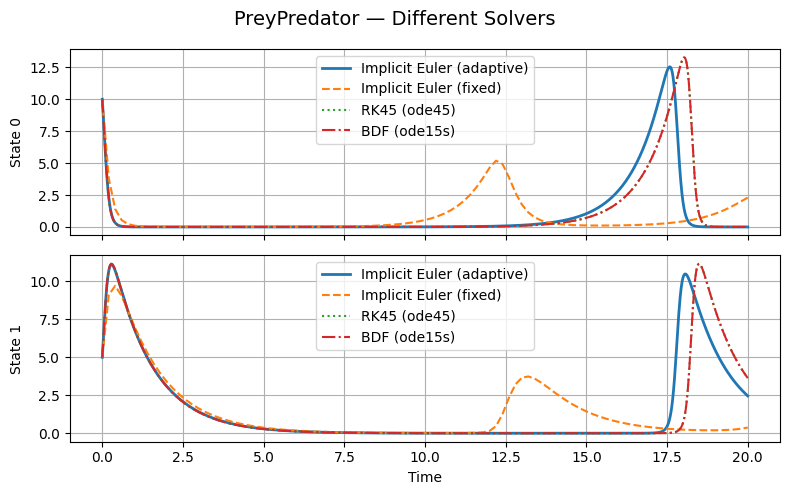


Running VanDerPol...


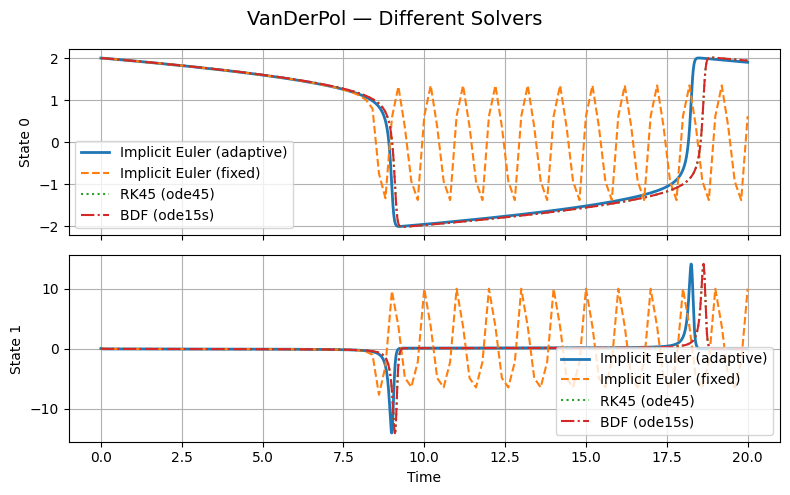


Running CSTR3...


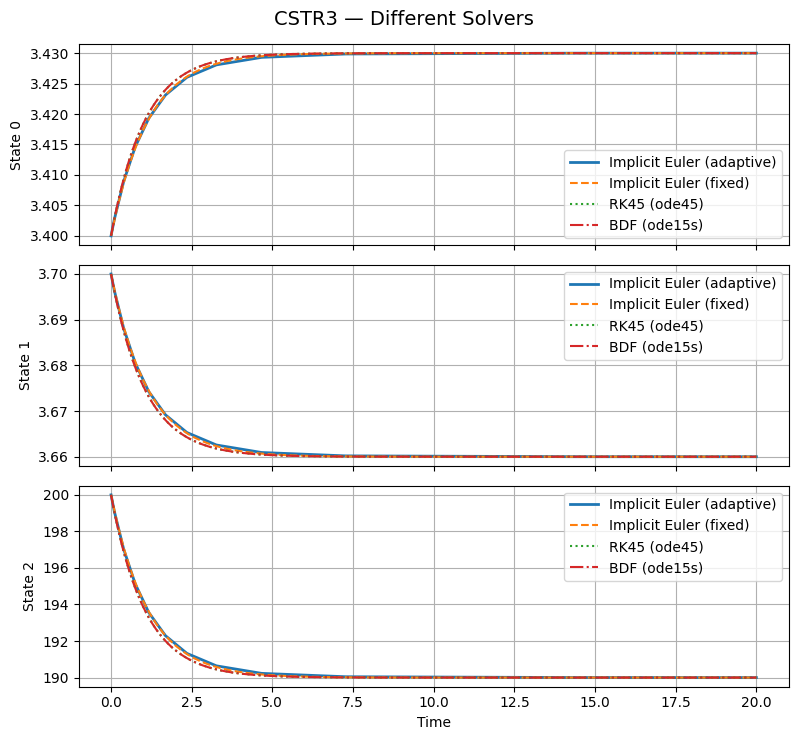


Running CSTR1...


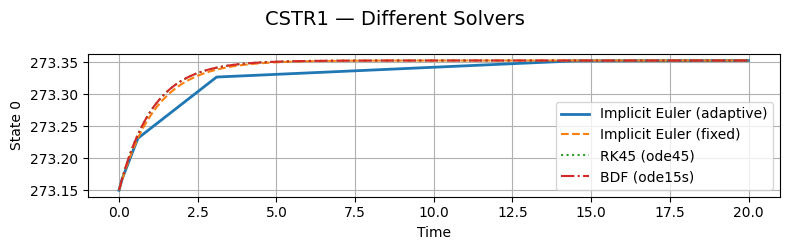

In [44]:
test_cases = [
    ("PreyPredator", [10.0, 5.0], PreyPredator_Fun_Jac),
    ("VanDerPol", [2.0, 0.0], VanDerPol_Fun_Jac),
    ("CSTR3", np.array([3.4, 3.7, 200]), CSTR3_Fun_Jac),
    ("CSTR1", np.array([273.15]), CSTR1_Fun_Jac),
]

for name, x0, fun_jac in test_cases:
    print(f"\nRunning {name}...")
    try:
        plot_results_with_reference(name, fun_jac, x0, t_span=(0.0, 20.0))
    except Exception as e:
        print(f"{name} FAILED: {e}")

Doing some comparison of stepsizes

In [21]:
import matplotlib.pyplot as plt

def fixed_step_convergence_study(name, fun_jac, x0, t_span):
    t0, tf = t_span
    x0 = np.atleast_1d(x0)
    
    # Reference solution (very accurate BDF)
    def rhs(t, x): return fun_jac(t, x)[0]
    def jac(t, x): return fun_jac(t, x)[1]
    
    sol_ref = solve_ivp(rhs, [t0, tf], x0, method='BDF', jac=jac, atol=1e-10, rtol=1e-10)
    x_ref = sol_ref.y[:, -1]

    N_vals = [25, 50, 100, 200, 400, 800]
    errors = []
    hs = []

    for N in N_vals:
        T, X = implicit_euler_fixed_step(fun_jac, t0, tf, N, x0)
        x_final = X[-1, :]
        err = np.linalg.norm(x_final - x_ref, ord=2)
        errors.append(err)
        hs.append((tf - t0) / N)

    # Plot log-log error vs h
    plt.figure(figsize=(6, 4))
    plt.loglog(hs, errors, 'o-', lw=2)
    plt.grid(True, which="both", ls="--")
    plt.xlabel("Step size h")
    plt.ylabel("Global error at t = tf")
    plt.title(f"{name} — Fixed-Step Convergence")
    plt.show()


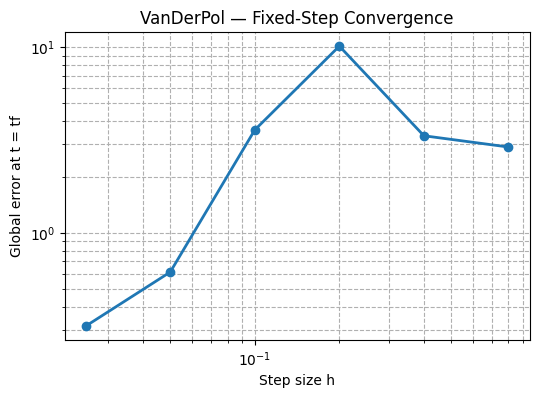

In [22]:
x0 = np.array([2.0, 0.0])
fixed_step_convergence_study("VanDerPol", VanDerPol_Fun_Jac, x0, t_span=(0.0, 20.0))


In [39]:
def plot_fixed_step_solutions(name, fun_jac, x0, t_span):
    t0, tf = t_span
    x0 = np.atleast_1d(x0)

    N_vals = [25, 50, 100, 200, 400, 800]
    state_idx = 0  # index of the state variable to plot

    plt.figure(figsize=(10, 6))
    for N in N_vals:
        T, X = implicit_euler_fixed_step(fun_jac, t0, tf, N, x0)
        X = np.atleast_2d(X)
        label = f'N={N}, h={(tf - t0) / N:.3f}'
        plt.plot(T, X[:, state_idx], label=label)

    # Reference solution
    def rhs(t, x): return fun_jac(t, x)[0]
    sol_ref = solve_ivp(rhs, [t0, tf], x0, method='BDF', atol=1e-10, rtol=1e-10)
    plt.plot(sol_ref.t, sol_ref.y[state_idx], 'k--', lw=2, label='Reference (BDF)')

    plt.title(f'{name} – Fixed-Step Implicit Euler x1 at Various Step Sizes')
    plt.xlabel("Time")
    plt.ylabel("x1")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


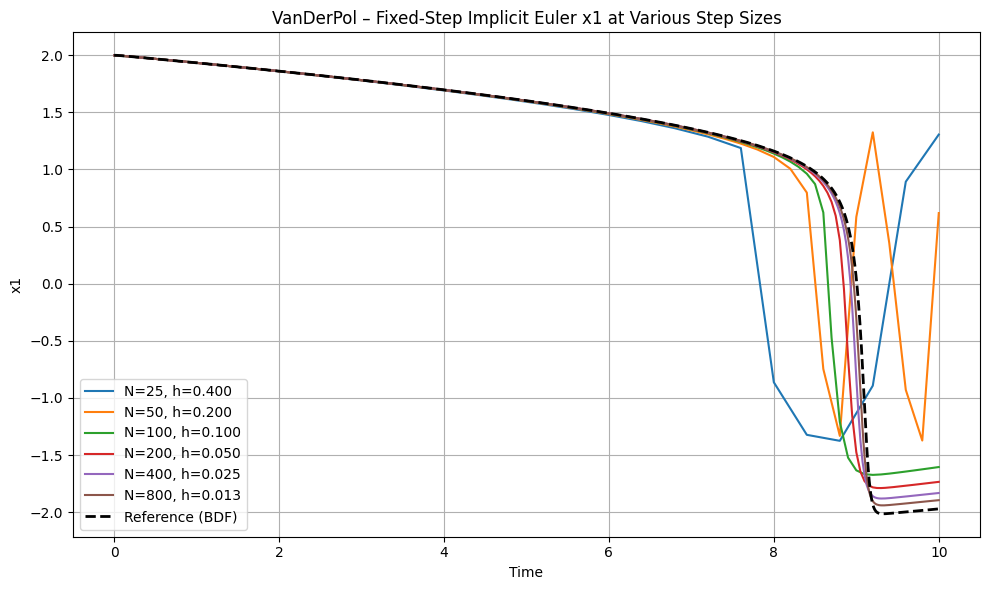

In [40]:
x0 = np.array([2.0, 0.0])
plot_fixed_step_solutions("VanDerPol", VanDerPol_Fun_Jac, x0, t_span=(0.0, 10.0))


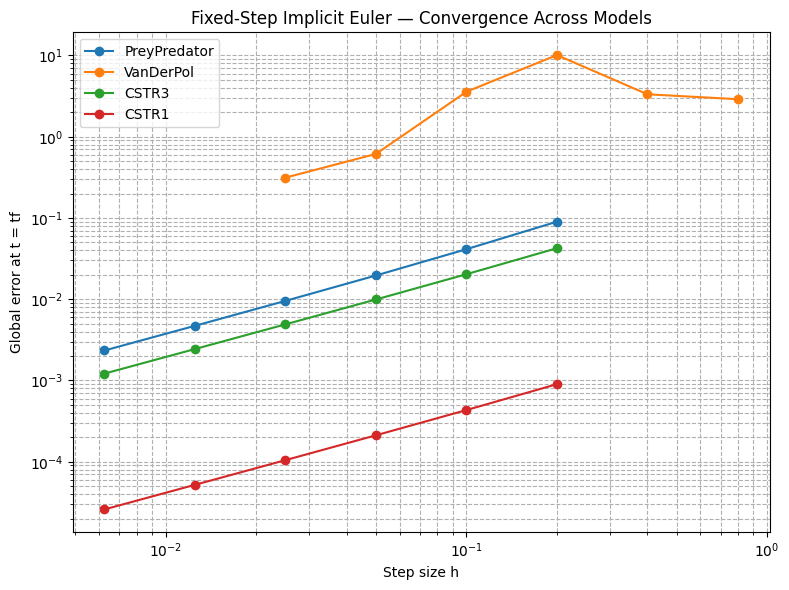

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Assumes these are available
from project.models import (
    PreyPredator_Fun_Jac, VanDerPol_Fun_Jac, CSTR3_Fun_Jac, CSTR1_Fun_Jac
)

# Convergence study for one model
def convergence_study(name, fun_jac, x0, t_span):
    t0, tf = t_span
    x0 = np.atleast_1d(np.array(x0))
    
    def rhs(t, x): return fun_jac(t, x)[0]
    def jac(t, x): return fun_jac(t, x)[1]

    # Reference solution (high-accuracy BDF)
    sol_ref = solve_ivp(rhs, [t0, tf], x0, method='BDF', jac=jac, atol=1e-10, rtol=1e-10)
    x_ref = sol_ref.y[:, -1]

    N_vals = [25, 50, 100, 200, 400, 800]
    errors = []
    hs = []

    for N in N_vals:
        T, X = implicit_euler_fixed_step(fun_jac, t0, tf, N, x0)
        x_final = X[-1, :]
        err = np.linalg.norm(x_final - x_ref, ord=2)
        errors.append(err)
        hs.append((tf - t0) / N)

    return hs, errors

# List of test problems
test_cases = [
    ("PreyPredator", [10.0, 5.0], PreyPredator_Fun_Jac, (0.0, 5.0)),
    ("VanDerPol", [2.0, 0.0], VanDerPol_Fun_Jac, (0.0, 20.0)),
    ("CSTR3", [3.4, 3.7, 200], CSTR3_Fun_Jac, (0.0, 5.0)),
    ("CSTR1", [273.15], CSTR1_Fun_Jac, (0.0, 5.0)),
]

# Plot all convergence results
plt.figure(figsize=(8, 6))
for name, x0, fun_jac, t_span in test_cases:
    hs, errors = convergence_study(name, fun_jac, x0, t_span)
    plt.loglog(hs, errors, marker='o', label=name)

plt.xlabel("Step size h")
plt.ylabel("Global error at t = tf")
plt.title("Fixed-Step Implicit Euler — Convergence Across Models")
plt.grid(True, which="both", linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


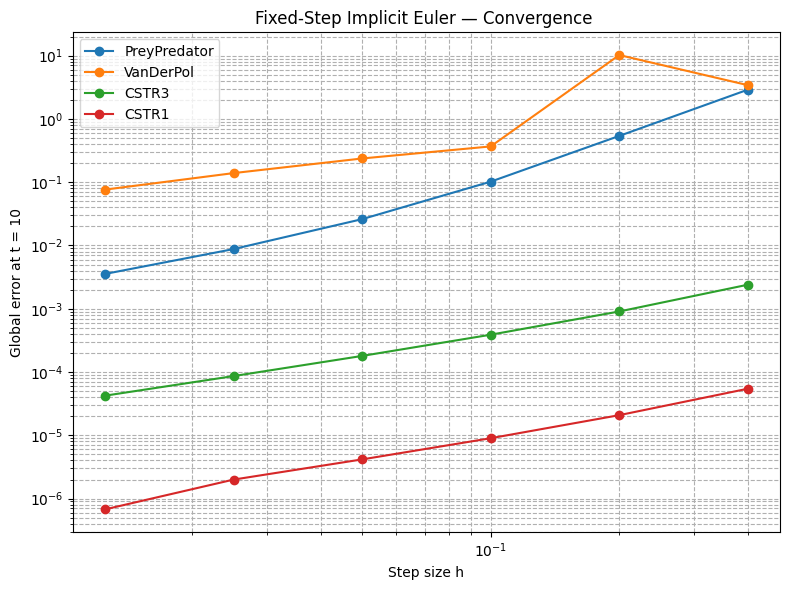

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

from project.models import (
    PreyPredator_Fun_Jac, VanDerPol_Fun_Jac, CSTR3_Fun_Jac, CSTR1_Fun_Jac
)

def convergence_study(name, fun_jac, x0, t_span):
    t0, tf = t_span
    x0 = np.atleast_1d(np.array(x0))

    def rhs(t, x): return fun_jac(t, x)[0]
    def jac(t, x): return fun_jac(t, x)[1]

    # Accurate reference solution
    sol_ref = solve_ivp(rhs, [t0, tf], x0, method='BDF', jac=jac, atol=1e-10, rtol=1e-10)
    x_ref = sol_ref.y[:, -1]

    N_vals = [25, 50, 100, 200, 400, 800]
    errors = []
    hs = []

    for N in N_vals:
        T, X = implicit_euler_fixed_step(fun_jac, t0, tf, N, x0)
        x_final = X[-1, :]
        err = np.linalg.norm(x_final - x_ref, ord=2)
        errors.append(err)
        hs.append((tf - t0) / N)

    return hs, errors

# Fixed time interval for all problems
t_span = (0.0, 10.0)

test_cases = [
    ("PreyPredator", [10.0, 5.0], PreyPredator_Fun_Jac),
    ("VanDerPol", [2.0, 0.0], VanDerPol_Fun_Jac),
    ("CSTR3", [3.4, 3.7, 200], CSTR3_Fun_Jac),
    ("CSTR1", [273.15], CSTR1_Fun_Jac),
]

# Run and plot convergence curves
plt.figure(figsize=(8, 6))
for name, x0, fun_jac in test_cases:
    hs, errors = convergence_study(name, fun_jac, x0, t_span)
    plt.loglog(hs, errors, marker='o', label=name)

plt.xlabel("Step size h")
plt.ylabel("Global error at t = 10")
plt.title("Fixed-Step Implicit Euler — Convergence ")
plt.grid(True, which="both", linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


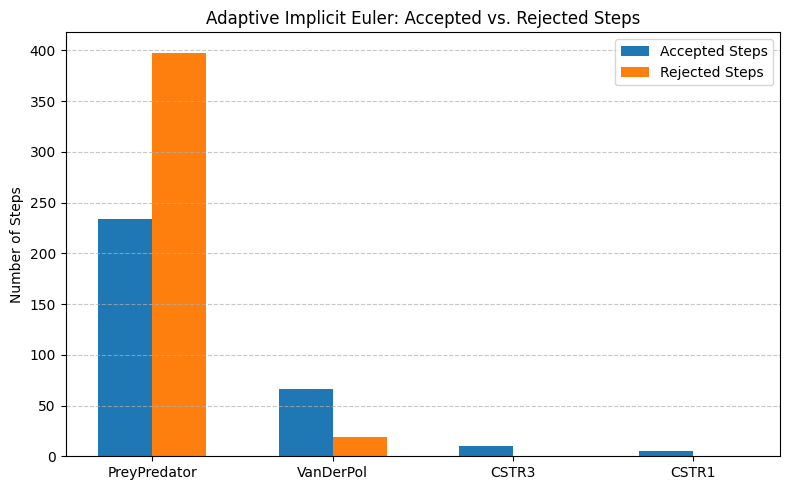

In [43]:
models = ["PreyPredator", "VanDerPol", "CSTR3", "CSTR1"]
accepted_steps = [234, 66, 10, 5]
rejected_steps = [398, 19, 0, 0]

x = np.arange(len(models))

plt.figure(figsize=(8, 5))
plt.bar(x - 0.15, accepted_steps, width=0.3, label="Accepted Steps")
plt.bar(x + 0.15, rejected_steps, width=0.3, label="Rejected Steps")

plt.xticks(x, models)
plt.ylabel("Number of Steps")
plt.title("Adaptive Implicit Euler: Accepted vs. Rejected Steps")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
##include the others 

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

def PFR_3state(t, C, Cin, p):
    CAin, CBin, Tin = Cin
    n = p['Nz']
    dz = p['dz']
    v = p['v']
    F = p['F']
    A = 0.1
    vol = F / A

    k0 = np.exp(24.6)
    DA = DB = DT = 0.1
    Ea_over_R = 8500

    CA = C[0:n]
    CB = C[n:2*n]
    T = C[2*n:3*n]

    k = k0 * np.exp(-Ea_over_R / T)
    r = k * CA * CB

    # Convection
    NconvA = np.zeros(n + 1); NconvA[0] = vol * CAin; NconvA[1:] = vol * CA
    NconvB = np.zeros(n + 1); NconvB[0] = vol * CBin; NconvB[1:] = vol * CB
    NconvT = np.zeros(n + 1); NconvT[0] = vol * Tin;  NconvT[1:] = vol * T

    # Diffusion
    JA = np.zeros(n + 1); JA[1:n] = (-DA / dz) * (CA[1:] - CA[:-1])
    JB = np.zeros(n + 1); JB[1:n] = (-DB / dz) * (CB[1:] - CB[:-1])
    JT = np.zeros(n + 1); JT[1:n] = (-DT / dz) * (T[1:] - T[:-1])

    # Total flux
    NA = NconvA + JA
    NB = NconvB + JB
    NT = NconvT + JT

    # Reaction terms
    RA = -r
    RB = -2 * r
    RT = -560 / (1.0 * 4.186) * r  # ∆H / (ρ * Cp)

    # Derivatives
    dCA = (NA[1:] - NA[:-1]) / -dz + RA
    dCB = (NB[1:] - NB[:-1]) / -dz + RB
    dT  = (NT[1:] - NT[:-1]) / -dz + RT

    return np.concatenate([dCA, dCB, dT])


# Implicit Euler for DAE/ODE system
def implicit_euler(f, x0, t_span, h, Cin, p, maxit=20, tol=1e-8):
    t0, tf = t_span
    ts = [t0]
    xs = [x0]
    t = t0
    x = x0

    while t < tf:
        t_next = t + h

        def G(x_new): return x_new - x - h * f(t_next, x_new, Cin, p)
        sol = root(G, x, method='hybr', options={'maxfev': maxit, 'xtol': tol})

        if not sol.success:
            raise RuntimeError("Newton iteration failed at t = {}".format(t))

        x = sol.x
        t = t_next
        xs.append(x)
        ts.append(t)

    return np.array(ts), np.array(xs)


# Parameters and Initial Conditions
Nz = 30
dz = 10 / Nz
params = {
    "Nz": Nz,
    "dz": dz,
    "v": 3.0,
    "F": 0.1,
}
Cin = (1.6, 2.4, 350.0)
CA0 = np.full(Nz, 0.1)
CB0 = np.full(Nz, 0.1)
T0  = np.full(Nz, 300.0)
x0 = np.concatenate([CA0, CB0, T0])

# Run the simulation
ts, xs = implicit_euler(PFR_3state, x0, (0, 5), h=0.05, Cin=Cin, p=params)

# Plotting temperature at different times
z = np.linspace(0, 10, Nz)
plt.figure()
for i, t_val in enumerate([0, 0.5, 1.5, 3.0, 5.0]):
    idx = np.argmin(np.abs(ts - t_val))
    T = xs[idx, 2*Nz:]
    plt.plot(z, T, label=f"t = {ts[idx]:.1f} s")

plt.xlabel("Reactor Length z")
plt.ylabel("Temperature T")
plt.title("Temperature Profile in 3-State PFR Over Time (Implicit Euler)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


RuntimeError: Newton iteration failed at t = 0

In [46]:
from scipy.sparse import lil_matrix

def PFR_3state_Jac(t, C, Cin, p):
    CAin, CBin, Tin = Cin
    n = p['Nz']
    dz = p['dz']
    v = p['v']
    F = p['F']
    A = 0.1
    vol = F / A

    k0 = np.exp(24.6)
    DA = DB = DT = 0.1
    Ea_over_R = 8500
    beta = -560 / (1.0 * 4.186)  # -∆H / (ρ cp)

    CA = C[0:n]
    CB = C[n:2*n]
    T  = C[2*n:3*n]

    k = k0 * np.exp(-Ea_over_R / T)
    r = k * CA * CB
    dk_dT = k * Ea_over_R / T**2

    # Derivatives of reaction terms
    dr_dCA = k * CB
    dr_dCB = k * CA
    dr_dT  = dk_dT * CA * CB

    J = lil_matrix((3*n, 3*n))

    for i in range(n):
        # Indices
        ia = i
        ib = i + n
        it = i + 2 * n

        # Flux derivatives (central difference stencil)
        for var, diff, idx in [('A', DA, ia), ('B', DB, ib), ('T', DT, it)]:
            if i > 0:
                J[idx, idx - 1] += diff / dz**2 - vol / dz
            if i < n - 1:
                J[idx, idx + 1] += diff / dz**2
            J[idx, idx] += -2 * diff / dz**2 + vol / dz

        # Reaction derivatives
        # d(CA)/dt
        J[ia, ia] += dr_dCA[i]
        J[ia, ib] += dr_dCB[i]
        J[ia, it] += dr_dT[i]

        # d(CB)/dt
        J[ib, ia] += 2 * dr_dCA[i]
        J[ib, ib] += 2 * dr_dCB[i]
        J[ib, it] += 2 * dr_dT[i]

        # d(T)/dt
        J[it, ia] += beta * dr_dCA[i]
        J[it, ib] += beta * dr_dCB[i]
        J[it, it] += beta * dr_dT[i]

    return J.tocsr()


In [47]:
from scipy.sparse.linalg import spsolve

def implicit_euler_with_jacobian(f, jac, x0, t_span, h, Cin, p):
    t0, tf = t_span
    ts = [t0]
    xs = [x0]
    t = t0
    x = x0

    while t < tf:
        t_next = t + h

        # Residual function for implicit Euler
        def G(x_new):
            return x_new - x - h * f(t_next, x_new, Cin, p)

        # Jacobian of G: I - h * J
        J = jac(t_next, x, Cin, p)
        I = np.eye(len(x))
        JG = I - h * J

        # Newton step: solve JG * dx = -G
        for _ in range(10):
            Gx = G(x)
            dx = spsolve(JG, -Gx)
            x = x + dx
            if np.linalg.norm(dx) < 1e-8:
                break

        t = t_next
        ts.append(t)
        xs.append(x)

    return np.array(ts), np.array(xs)


/var/folders/q3/3rts4g613pv9wy5pq7tw8lkr0000gn/T/ipykernel_56977/1273580519.py:114: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  dx = spsolve(JG, -Gx)


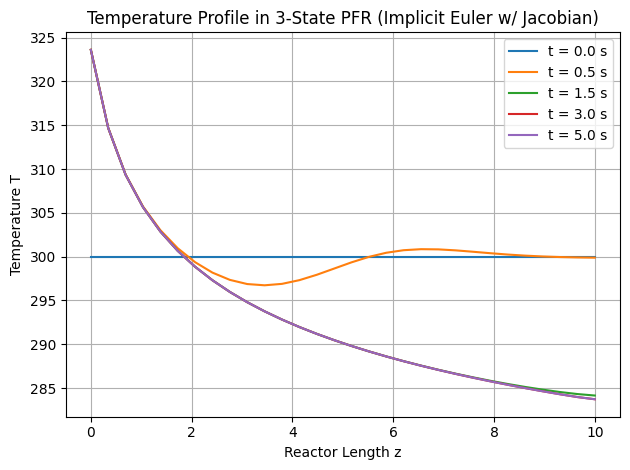

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

# --- Model ---
def PFR_3state(t, C, Cin, p):
    CAin, CBin, Tin = Cin
    n, dz, v, F = p['Nz'], p['dz'], p['v'], p['F']
    A = 0.1
    vol = F / A
    k0 = np.exp(24.6)
    DA = DB = DT = 0.1
    Ea_over_R = 8500

    CA = C[0:n]
    CB = C[n:2*n]
    T  = C[2*n:3*n]
    k = k0 * np.exp(-Ea_over_R / T)
    r = k * CA * CB

    # Convection
    NconvA = np.zeros(n + 1); NconvA[0] = vol * CAin; NconvA[1:] = vol * CA
    NconvB = np.zeros(n + 1); NconvB[0] = vol * CBin; NconvB[1:] = vol * CB
    NconvT = np.zeros(n + 1); NconvT[0] = vol * Tin;  NconvT[1:] = vol * T

    # Diffusion
    JA = np.zeros(n + 1); JA[1:n] = (-DA/dz) * (CA[1:] - CA[:-1])
    JB = np.zeros(n + 1); JB[1:n] = (-DB/dz) * (CB[1:] - CB[:-1])
    JT = np.zeros(n + 1); JT[1:n] = (-DT/dz) * (T[1:] - T[:-1])

    # Flux
    NA = NconvA + JA
    NB = NconvB + JB
    NT = NconvT + JT

    RA = -r
    RB = -2 * r
    RT = -560 / (1.0 * 4.186) * r  # beta = -∆H / (ρ cp)

    dCA = (NA[1:] - NA[:-1]) / -dz + RA
    dCB = (NB[1:] - NB[:-1]) / -dz + RB
    dT  = (NT[1:] - NT[:-1]) / -dz + RT

    return np.concatenate([dCA, dCB, dT])


# --- Jacobian ---
def PFR_3state_Jac(t, C, Cin, p):
    CAin, CBin, Tin = Cin
    n, dz, v, F = p['Nz'], p['dz'], p['v'], p['F']
    A = 0.1
    vol = F / A
    k0 = np.exp(24.6)
    DA = DB = DT = 0.1
    Ea_over_R = 8500
    beta = -560 / (1.0 * 4.186)

    CA = C[0:n]
    CB = C[n:2*n]
    T  = C[2*n:3*n]
    k = k0 * np.exp(-Ea_over_R / T)
    dk_dT = k * Ea_over_R / T**2

    dr_dCA = k * CB
    dr_dCB = k * CA
    dr_dT  = dk_dT * CA * CB

    J = lil_matrix((3*n, 3*n))

    for i in range(n):
        ia, ib, it = i, i + n, i + 2 * n
        for d, D, idx in [('A', DA, ia), ('B', DB, ib), ('T', DT, it)]:
            if i > 0:
                J[idx, idx - 1] += D / dz**2 - vol / dz
            if i < n - 1:
                J[idx, idx + 1] += D / dz**2
            J[idx, idx] += -2 * D / dz**2 + vol / dz

        # Reaction terms
        J[ia, ia] += dr_dCA[i]
        J[ia, ib] += dr_dCB[i]
        J[ia, it] += dr_dT[i]
        J[ib, ia] += 2 * dr_dCA[i]
        J[ib, ib] += 2 * dr_dCB[i]
        J[ib, it] += 2 * dr_dT[i]
        J[it, ia] += beta * dr_dCA[i]
        J[it, ib] += beta * dr_dCB[i]
        J[it, it] += beta * dr_dT[i]

    return J.tocsr()


# --- Implicit Euler with Analytic Jacobian ---
def implicit_euler_with_jacobian(f, jac, x0, t_span, h, Cin, p):
    t0, tf = t_span
    ts = [t0]
    xs = [x0]
    t = t0
    x = x0

    while t < tf:
        t_next = t + h

        def G(x_new):
            return x_new - x - h * f(t_next, x_new, Cin, p)

        J = jac(t_next, x, Cin, p)
        I = np.eye(len(x))
        JG = I - h * J

        for _ in range(10):
            Gx = G(x)
            dx = spsolve(JG, -Gx)
            x = x + dx
            if np.linalg.norm(dx) < 1e-8:
                break

        t = t_next
        ts.append(t)
        xs.append(x)

    return np.array(ts), np.array(xs)


# --- Run Simulation and Plot ---
Nz = 30
dz = 10 / Nz
params = {"Nz": Nz, "dz": dz, "v": 3.0, "F": 0.1}
Cin = (1.6, 2.4, 350.0)
CA0 = np.full(Nz, 0.1)
CB0 = np.full(Nz, 0.1)
T0  = np.full(Nz, 300.0)
x0 = np.concatenate([CA0, CB0, T0])

ts, xs = implicit_euler_with_jacobian(PFR_3state, PFR_3state_Jac, x0, (0, 5), h=0.01, Cin=Cin, p=params)

z = np.linspace(0, 10, Nz)
plt.figure()
for t_val in [0, 0.5, 1.5, 3.0, 5.0]:
    idx = np.argmin(np.abs(ts - t_val))
    T = xs[idx, 2*Nz:]
    plt.plot(z, T, label=f"t = {ts[idx]:.1f} s")

plt.xlabel("Reactor Length z")
plt.ylabel("Temperature T")
plt.title("Temperature Profile in 3-State PFR (Implicit Euler w/ Jacobian)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


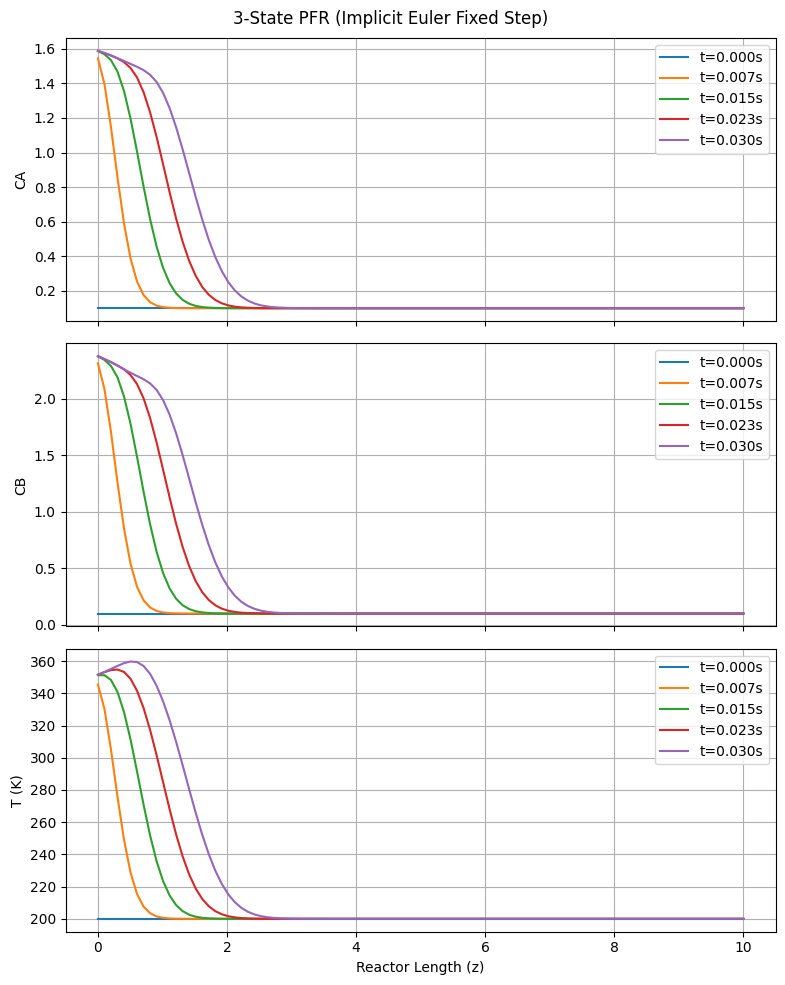

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# --- PFR 3-State Function ---
def PFR_3state(t, C, Cin, p):
    CAin, CBin, Tin = Cin
    n, dz, v, F = p['Nz'], p['dz'], p['v'], p['F']
    k0, DA, DB, DT = np.exp(24.6), 0.1, 0.1, 0.1
    Ea_over_R = 8500

    CA, CB, T = C[:n], C[n:2*n], C[2*n:3*n]
    k = k0 * np.exp(-Ea_over_R / T)
    r = k * CA * CB

    def flux(C, D, Cin_):
        N = np.zeros(n+1)
        J = np.zeros(n+1)
        N[0] = F * Cin_
        N[1:] = F * C
        J[1:n] = (-D / dz) * (C[1:] - C[:-1])
        return N + J

    NA = flux(CA, DA, CAin)
    NB = flux(CB, DB, CBin)
    NT = flux(T, DT, Tin)

    RA = v[0] * r
    RB = v[1] * r
    RT = v[2] * r

    dCA = (NA[1:] - NA[:-1]) / -dz + RA
    dCB = (NB[1:] - NB[:-1]) / -dz + RB
    dT = (NT[1:] - NT[:-1]) / -dz + RT

    return np.concatenate([dCA, dCB, dT])

# --- Fixed-Step Implicit Euler ---
def implicit_euler_fixed_step(fun, t0, tf, x0, N, Cin, p):
    dt = (tf - t0) / N
    T = np.zeros(N + 1)
    X = np.zeros((N + 1, len(x0)))
    T[0], X[0] = t0, x0
    tol = 1e-8
    maxit = 20

    for k in range(N):
        x_old = X[k]
        x_new = x_old.copy()
        for _ in range(maxit):
            f_val = fun(T[k+1], x_new, Cin, p)
            F = x_new - x_old - dt * f_val
            if np.linalg.norm(F, np.inf) < tol:
                break
            # Approximate Jacobian via finite differences
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x_new.copy()
                x_pert[i] += eps
                J[:, i] = (x_pert - x_new - dt * (fun(T[k+1], x_pert, Cin, p) - f_val)) / eps
            dx = np.linalg.solve(J, -F)
            x_new += dx
        X[k+1] = x_new
        T[k+1] = T[k] + dt

    return T, X

# --- Parameters Matching Your Setup ---
Nz = 100
L = 10
deltaHr = -560
rho = 1.0
cp = 4.186
beta = -deltaHr / (rho * cp)
v_vec = np.array([-1, -2, beta])
F = 50
dz = L / Nz
p = {'Nz': Nz, 'dz': dz, 'v': v_vec, 'F': F}
Cin = np.array([1.6, 2.4, 350])
CA0 = np.full(Nz, 0.1)
CB0 = np.full(Nz, 0.1)
T0 = np.full(Nz, 200)
C0 = np.concatenate([CA0, CB0, T0])

# --- Run the Solver ---
t_span = (0, 0.03)
N_steps = 100
T, X = implicit_euler_fixed_step(PFR_3state, *t_span, C0, N_steps, Cin, p)

# --- Plotting CA, CB, T ---
fig, axs = plt.subplots(3, 1, figsize=(8, 10), sharex=True)
z = np.linspace(0, L, Nz)
times_to_plot = np.linspace(0, t_span[1], 5)
indices = [np.argmin(np.abs(T - t)) for t in times_to_plot]

for i in indices:
    CA_i = X[i, 0:Nz]
    CB_i = X[i, Nz:2*Nz]
    T_i = X[i, 2*Nz:3*Nz]

    axs[0].plot(z, CA_i, label=f't={T[i]:.3f}s')
    axs[1].plot(z, CB_i, label=f't={T[i]:.3f}s')
    axs[2].plot(z, T_i, label=f't={T[i]:.3f}s')

axs[0].set_ylabel('CA')
axs[1].set_ylabel('CB')
axs[2].set_ylabel('T (K)')
axs[2].set_xlabel('Reactor Length (z)')

for ax in axs:
    ax.legend()
    ax.grid(True)

fig.suptitle('3-State PFR (Implicit Euler Fixed Step)')
plt.tight_layout()
plt.show()


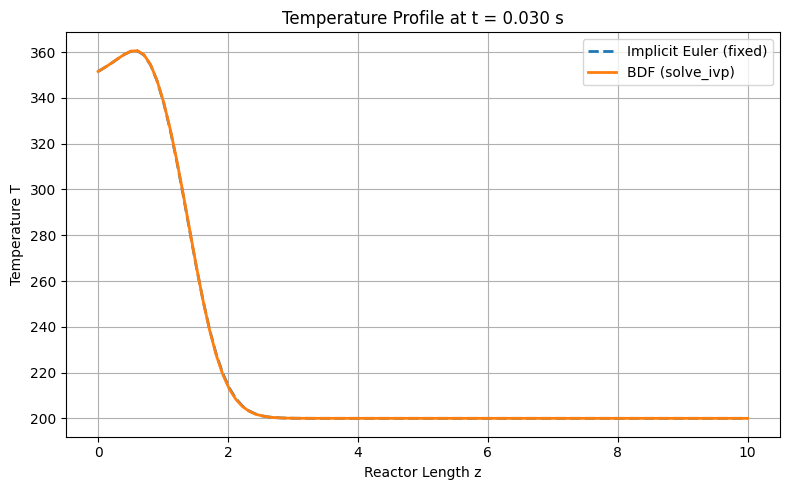

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- PFR 3-State Function ---
def PFR_3state(t, C, Cin, p):
    CAin, CBin, Tin = Cin
    n, dz, v, F = p['Nz'], p['dz'], p['v'], p['F']
    k0, DA, DB, DT = np.exp(24.6), 0.1, 0.1, 0.1
    Ea_over_R = 8500

    CA, CB, T = C[:n], C[n:2*n], C[2*n:3*n]
    k = k0 * np.exp(-Ea_over_R / T)
    r = k * CA * CB

    def flux(C, D, Cin_):
        N = np.zeros(n+1)
        J = np.zeros(n+1)
        N[0] = F * Cin_
        N[1:] = F * C
        J[1:n] = (-D / dz) * (C[1:] - C[:-1])
        return N + J

    NA = flux(CA, DA, CAin)
    NB = flux(CB, DB, CBin)
    NT = flux(T, DT, Tin)

    RA = v[0] * r
    RB = v[1] * r
    RT = v[2] * r

    dCA = (NA[1:] - NA[:-1]) / -dz + RA
    dCB = (NB[1:] - NB[:-1]) / -dz + RB
    dT  = (NT[1:] - NT[:-1]) / -dz + RT

    return np.concatenate([dCA, dCB, dT])

# --- Fixed-Step Implicit Euler (at t_eval) ---
def implicit_euler_at_t_eval(f, t_eval, x0, Cin, p):
    n_eval = len(t_eval)
    X = np.zeros((n_eval, len(x0)))
    X[0] = x0
    tol = 1e-8
    maxit = 20

    for k in range(1, n_eval):
        dt = t_eval[k] - t_eval[k-1]
        x_old = X[k-1]
        x_new = x_old.copy()

        for _ in range(maxit):
            f_val = f(t_eval[k], x_new, Cin, p)
            F = x_new - x_old - dt * f_val
            if np.linalg.norm(F, np.inf) < tol:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x_new.copy()
                x_pert[i] += eps
                f_pert = f(t_eval[k], x_pert, Cin, p)
                J[:, i] = (x_pert - x_new - dt * (f_pert - f_val)) / eps
            dx = np.linalg.solve(J, -F)
            x_new += dx
        X[k] = x_new

    return t_eval, X

# --- Parameters ---
Nz = 100
L = 10
deltaHr = -560
rho = 1.0
cp = 4.186
beta = -deltaHr / (rho * cp)
v_vec = np.array([-1, -2, beta])
F = 50
dz = L / Nz
p = {'Nz': Nz, 'dz': dz, 'v': v_vec, 'F': F}
Cin = np.array([1.6, 2.4, 350])
CA0 = np.full(Nz, 0.1)
CB0 = np.full(Nz, 0.1)
T0  = np.full(Nz, 200)
C0 = np.concatenate([CA0, CB0, T0])

# --- Time settings ---
t_span = (0, 0.03)
t_eval = np.linspace(*t_span, 1000)

# --- Solve with Implicit Euler (custom) ---
T_euler, X_euler = implicit_euler_at_t_eval(PFR_3state, t_eval, C0, Cin, p)

# --- Solve with solve_ivp (BDF) at t_eval ---
sol_bdf = solve_ivp(PFR_3state, t_span, C0, args=(Cin, p), t_eval=t_eval, method='BDF')

# --- Plot temperature at selected time steps ---
fig, ax = plt.subplots(figsize=(8, 5))
z = np.linspace(0, L, Nz)
T_idx = -1  # final time index

# Extract temperature
T_final_euler = X_euler[T_idx, 2*Nz:3*Nz]
T_final_bdf   = sol_bdf.y[2*Nz:3*Nz, T_idx]

ax.plot(z, T_final_euler, '--', label='Implicit Euler (fixed)', linewidth=2)
ax.plot(z, T_final_bdf, '-', label='BDF (solve_ivp)', linewidth=2)

ax.set_title(f'Temperature Profile at t = {t_eval[T_idx]:.3f} s')
ax.set_xlabel('Reactor Length z')
ax.set_ylabel('Temperature T')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


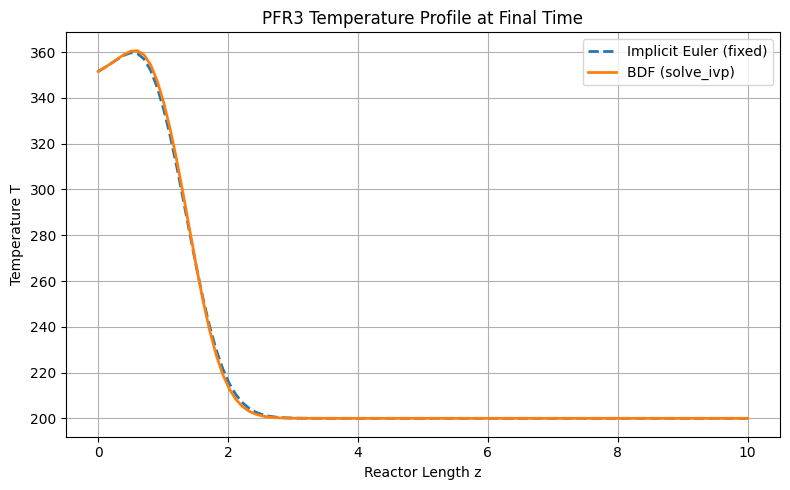

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- PFR 3-State Function ---
def PFR_3state(t, C, Cin, p):
    CAin, CBin, Tin = Cin
    n, dz, v, F = p['Nz'], p['dz'], p['v'], p['F']
    k0, DA, DB, DT = np.exp(24.6), 0.1, 0.1, 0.1
    Ea_over_R = 8500

    CA, CB, T = C[:n], C[n:2*n], C[2*n:3*n]
    k = k0 * np.exp(-Ea_over_R / T)
    r = k * CA * CB

    def flux(C, D, Cin_):
        N = np.zeros(n+1)
        J = np.zeros(n+1)
        N[0] = F * Cin_
        N[1:] = F * C
        J[1:n] = (-D / dz) * (C[1:] - C[:-1])
        return N + J

    NA = flux(CA, DA, CAin)
    NB = flux(CB, DB, CBin)
    NT = flux(T, DT, Tin)

    RA = v[0] * r
    RB = v[1] * r
    RT = v[2] * r

    dCA = (NA[1:] - NA[:-1]) / -dz + RA
    dCB = (NB[1:] - NB[:-1]) / -dz + RB
    dT = (NT[1:] - NT[:-1]) / -dz + RT

    return np.concatenate([dCA, dCB, dT])

# --- Fixed-Step Implicit Euler ---
def implicit_euler_fixed_step(fun, t0, tf, x0, N, Cin, p):
    dt = (tf - t0) / N
    T = np.zeros(N + 1)
    X = np.zeros((N + 1, len(x0)))
    T[0], X[0] = t0, x0
    tol = 1e-8
    maxit = 20

    for k in range(N):
        x_old = X[k]
        x_new = x_old.copy()
        for _ in range(maxit):
            f_val = fun(T[k+1], x_new, Cin, p)
            F = x_new - x_old - dt * f_val
            if np.linalg.norm(F, np.inf) < tol:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x_new.copy()
                x_pert[i] += eps
                J[:, i] = (x_pert - x_new - dt * (fun(T[k+1], x_pert, Cin, p) - f_val)) / eps
            dx = np.linalg.solve(J, -F)
            x_new += dx
        X[k+1] = x_new
        T[k+1] = T[k] + dt

    return T, X

# --- Parameters ---
Nz = 100
L = 10
deltaHr = -560
rho = 1.0
cp = 4.186
beta = -deltaHr / (rho * cp)
v_vec = np.array([-1, -2, beta])
F = 50
dz = L / Nz
p = {'Nz': Nz, 'dz': dz, 'v': v_vec, 'F': F}
Cin = np.array([1.6, 2.4, 350])
CA0 = np.full(Nz, 0.1)
CB0 = np.full(Nz, 0.1)
T0 = np.full(Nz, 200)
C0 = np.concatenate([CA0, CB0, T0])

# --- Time settings ---
t_span = (0, 0.03)
t_eval = np.linspace(*t_span, 1000)
N_steps = 100

# --- Solve using Implicit Euler ---
T_euler, X_euler = implicit_euler_fixed_step(PFR_3state, *t_span, C0, N_steps, Cin, p)

# --- Solve using solve_ivp with BDF ---
sol_bdf = solve_ivp(PFR_3state, t_span, C0, args=(Cin, p), t_eval=t_eval, method='BDF')

# --- Plot ---
fig, ax = plt.subplots(figsize=(8, 5))
z = np.linspace(0, L, Nz)

# Plot fixed-step Euler result
T_final_euler = X_euler[-1, 2 * Nz : 3 * Nz]
ax.plot(z, T_final_euler, label='Implicit Euler (fixed)', linestyle='--', linewidth=2)

# Plot BDF result
T_final_bdf = sol_bdf.y[2 * Nz : 3 * Nz, -1]
ax.plot(z, T_final_bdf, label='BDF (solve_ivp)', linestyle='-', linewidth=2)

# Labels and legend
ax.set_title('PFR3 Temperature Profile at Final Time')
ax.set_xlabel('Reactor Length z')
ax.set_ylabel('Temperature T')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- PFR 3-State Function ---
def PFR_3state(t, C, Cin, p):
    CAin, CBin, Tin = Cin
    n, dz, v, F = p['Nz'], p['dz'], p['v'], p['F']
    k0, DA, DB, DT = np.exp(24.6), 0.1, 0.1, 0.1
    Ea_over_R = 8500

    CA, CB, T = C[:n], C[n:2*n], C[2*n:3*n]
    k = k0 * np.exp(-Ea_over_R / T)
    r = k * CA * CB

    def flux(C, D, Cin_):
        N = np.zeros(n+1)
        J = np.zeros(n+1)
        N[0] = F * Cin_
        N[1:] = F * C
        J[1:n] = (-D / dz) * (C[1:] - C[:-1])
        return N + J

    NA = flux(CA, DA, CAin)
    NB = flux(CB, DB, CBin)
    NT = flux(T, DT, Tin)

    RA = v[0] * r
    RB = v[1] * r
    RT = v[2] * r

    dCA = (NA[1:] - NA[:-1]) / -dz + RA
    dCB = (NB[1:] - NB[:-1]) / -dz + RB
    dT  = (NT[1:] - NT[:-1]) / -dz + RT

    return np.concatenate([dCA, dCB, dT])


def implicit_euler_fixed_step(fun, t0, tf, x0, N, Cin, p):
    dt = (tf - t0) / N
    T = np.zeros(N + 1)
    X = np.zeros((N + 1, len(x0)))
    T[0], X[0] = t0, x0
    tol = 1e-8
    maxit = 20

    for k in range(N):
        x_old = X[k]
        x_new = x_old.copy()
        for _ in range(maxit):
            f_val = fun(T[k+1], x_new, Cin, p)
            F = x_new - x_old - dt * f_val
            if np.linalg.norm(F, np.inf) < tol:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x_new.copy()
                x_pert[i] += eps
                J[:, i] = (x_pert - x_new - dt * (fun(T[k+1], x_pert, Cin, p) - f_val)) / eps
            dx = np.linalg.solve(J, -F)
            x_new += dx
        X[k+1] = x_new
        T[k+1] = T[k] + dt

    return T, X


def implicit_euler_adaptive(fun, t0, tf, x0, h0, abstol, reltol, Cin, p):
    t, h = t0, h0
    x = x0.copy()
    T, X = [t], [x]
    maxit = 20
    tol_newton = 1e-8

    while t < tf:
        if t + h > tf:
            h = tf - t
        x_old = x
        
        # Step 1
        for _ in range(maxit):
            f_val = fun(t + h, x, Cin, p)
            F = x - x_old - h * f_val
            if np.linalg.norm(F, np.inf) < tol_newton:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x.copy()
                x_pert[i] += eps
                f_pert = fun(t + h, x_pert, Cin, p)
                J[:, i] = (x_pert - x - h * (f_pert - f_val)) / eps
            dx = np.linalg.solve(J, -F)
            x += dx

        
        # Step 2 (half step x2)
        h_half = 0.5 * h
        x_half = x_old.copy()
        for _ in range(maxit):
            f_half = fun(t + h_half, x_half, Cin, p)
            Fh = x_half - x_old - h_half * f_half
            if np.linalg.norm(Fh, np.inf) < tol_newton:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x_half.copy()
                x_pert[i] += eps
                f_pert = fun(t + h_half, x_pert, Cin, p)
                J[:, i] = (x_pert - x_half - h_half * (f_pert - f_half)) / eps
            dx = np.linalg.solve(J, -Fh)
            x_half += dx

        x_hat = x_half.copy()
        for _ in range(maxit):
            f_last = fun(t + h, x_hat, Cin, p)
            Fhh = x_hat - x_half - h_half * f_last
            if np.linalg.norm(Fhh, np.inf) < tol_newton:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x_hat.copy()
                x_pert[i] += eps
                f_pert = fun(t + h, x_pert, Cin, p)
                J[:, i] = (x_pert - x_hat - h_half * (f_pert - f_last)) / eps
            dx = np.linalg.solve(J, -Fhh)
            x_hat += dx

        # Error estimate
        err = np.abs(x_hat - x)
        denom = abstol + reltol * np.maximum(np.abs(x_hat), np.abs(x))
        r = np.max(err / denom)

        if r <= 1:
            t += h
            x = x_hat.copy()
            T.append(t)
            X.append(x)
        h *= min(5, max(0.1, 0.9 * r ** -0.5))

    return np.array(T), np.array(X)

# --- Parameters ---
Nz = 100
L = 10
deltaHr = -560
rho = 1.0
cp = 4.186
beta = -deltaHr / (rho * cp)
v_vec = np.array([-1, -2, beta])
F = 50
dz = L / Nz
p = {'Nz': Nz, 'dz': dz, 'v': v_vec, 'F': F}
Cin = np.array([1.6, 2.4, 350])
CA0 = np.full(Nz, 0.1)
CB0 = np.full(Nz, 0.1)
T0 = np.full(Nz, 200)
C0 = np.concatenate([CA0, CB0, T0])

# --- Time settings ---
t_span = (0, 0.03)
t_eval = np.linspace(*t_span, 1000)

# --- Fixed-step Implicit Euler ---
T_fixed, X_fixed = implicit_euler_fixed_step(PFR_3state, *t_span, C0, 100, Cin, p)

# --- BDF from solve_ivp ---
sol_bdf = solve_ivp(PFR_3state, t_span, C0, args=(Cin, p), t_eval=t_eval, method='BDF')

# --- Adaptive Implicit Euler ---
T_adapt, X_adapt = implicit_euler_adaptive(PFR_3state, *t_span, C0, h0=1e-4, abstol=1e-6, reltol=1e-3, Cin=Cin, p=p)

# --- Plot ---
fig, ax = plt.subplots(figsize=(8, 5))
z = np.linspace(0, L, Nz)

# Final time index
T_final_fixed = X_fixed[-1, 2*Nz:3*Nz]
T_final_bdf = sol_bdf.y[2*Nz:3*Nz, -1]
T_final_adapt = X_adapt[-1, 2*Nz:3*Nz]

ax.plot(z, T_final_fixed, '--', label='Implicit Euler (fixed)', linewidth=2)
ax.plot(z, T_final_bdf, '-', label='solve_ivp (BDF)', linewidth=2)
ax.plot(z, T_final_adapt, '-.', label='Adaptive Implicit Euler', linewidth=2)

ax.set_title('PFR3 Temperature Profile at Final Time')
ax.set_xlabel('Reactor Length z')
ax.set_ylabel('Temperature T')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

1 state

In [57]:
def implicit_euler_fixed_pfr1(f, jac, t_span, y0, N, u, p):
    t0, tf = t_span
    dt = (tf - t0) / N
    T = np.zeros(N + 1)
    Y = np.zeros((N + 1, len(y0)))

    T[0] = t0
    Y[0] = y0.copy()
    maxit = 20
    tol = 1e-8

    for k in range(N):
        t_prev = T[k]
        y_prev = Y[k].copy()
        y_new = y_prev.copy()

        for _ in range(maxit):
            f_val = f(t_prev + dt, y_new, u, p)
            F = y_new - y_prev - dt * f_val
            if np.linalg.norm(F, np.inf) < tol:
                break
            J = jac(t_prev + dt, y_new, u, p)
            J_sys = np.eye(len(y0)) - dt * J.toarray()
            dy = np.linalg.solve(J_sys, -F)
            y_new += dy

        Y[k + 1] = y_new
        T[k + 1] = t_prev + dt

    return T, Y


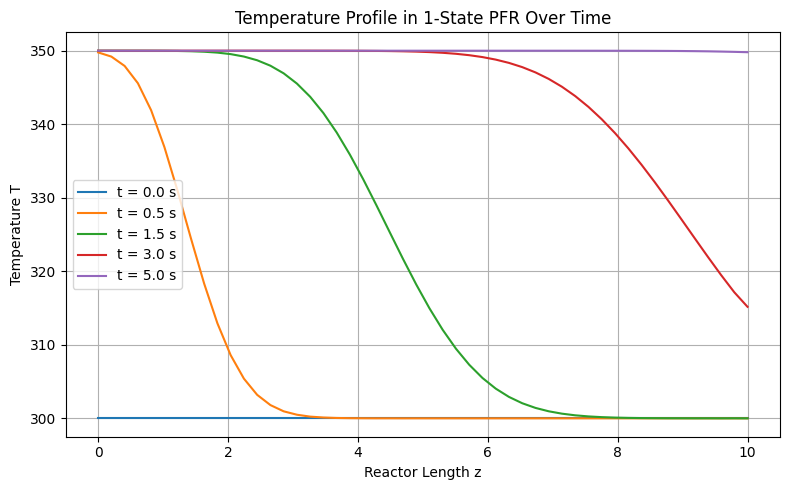

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.sparse import diags

# --- PFR Model ---
def PFR1(t, T, u, p):
    Nz = p["Nz"]
    dz = p["dz"]
    v = p["v"]
    DT = p["DT"]
    RT_fun = p.get("RT", lambda T: np.zeros_like(T))

    Tin_val = u if np.isscalar(u) else u(t)

    NT = np.zeros(Nz + 1)
    NT[0] = v * Tin_val
    for j in range(1, Nz):
        NT[j] = v * T[j - 1] - DT * (T[j] - T[j - 1]) / dz
    NT[Nz] = v * T[-1]

    dTdt = -(NT[1:] - NT[:-1]) / dz + RT_fun(T)
    return dTdt

# --- Jacobian ---
def PFR1_Jac(t, T, u, p):
    Nz = p["Nz"]
    dz = p["dz"]
    v = p["v"]
    DT = p["DT"]

    main_diag = np.full(Nz, v / dz + 2 * DT / dz**2)
    upper_diag = np.full(Nz - 1, -DT / dz**2)
    lower_diag = np.full(Nz - 1, -DT / dz**2 - v / dz)

    J = diags([main_diag, upper_diag, lower_diag], [0, 1, -1], format='csr')
    return J

# --- Parameters ---
params = {
    "Nz": 50,
    "dz": 0.2,
    "v": 3.0,
    "DT": 0.1,
    "RT": lambda T: 0.0 * T  # No reaction term
}

T0 = np.ones(params["Nz"]) * 300.0  # Initial temperature
Tin = lambda t: 350.0
.0  # Inlet temperature

# --- Integrate using BDF with Jacobian ---
sol = solve_ivp(
    fun=lambda t, T: PFR1(t, T, Tin, params),
    jac=lambda t, T: PFR1_Jac(t, T, Tin, params),
    t_span=(0, 5),
    y0=T0,
    method='BDF',
    t_eval=np.linspace(0, 5, 100)
)

# --- Plot ---
z = np.linspace(0, params["Nz"] * params["dz"], params["Nz"])
time_indices = [0, 10, 30, 60, 99]

plt.figure(figsize=(8, 5))
for i in time_indices:
    plt.plot(z, sol.y[:, i], label=f't = {sol.t[i]:.1f} s')

plt.xlabel("Reactor Length z")
plt.ylabel("Temperature T")
plt.title("Temperature Profile in 1-State PFR Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/q3/3rts4g613pv9wy5pq7tw8lkr0000gn/T/ipykernel_56977/1331473391.py:45: RuntimeWarning: invalid value encountered in multiply
  "RT": lambda T: 0.0 * T  # No reaction term


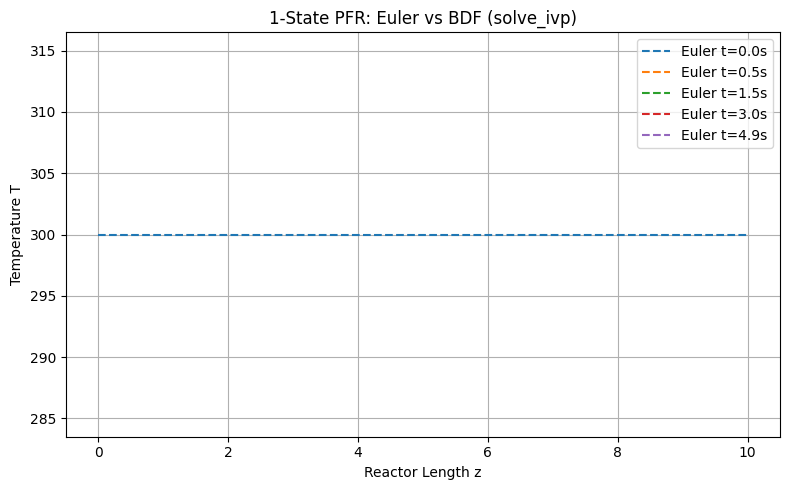

In [63]:
# Run implicit Euler with same setup as solve_ivp
def PFR1(t, T, u, p):
    Nz = p["Nz"]
    dz = p["dz"]
    v = p["v"]
    DT = p["DT"]
    RT_fun = p.get("RT", lambda T: np.zeros_like(T))

    Tin_val = u(t)

    T_edge = np.concatenate([[Tin_val], T])
    NT = np.zeros(Nz + 1)
    for j in range(1, Nz + 1):
        NT[j] = v * T_edge[j - 1] - DT * (T_edge[j] - T_edge[j - 1]) / dz

    dTdt = -(NT[1:] - NT[:-1]) / dz + RT_fun(T)
    return dTdt


N_steps = 100
T_euler, Y_euler = implicit_euler_fixed_pfr1(PFR1, PFR1_Jac, (0, 5), T0, N_steps, Tin, params)

# Compare solve_ivp (BDF) vs Implicit Euler
z = np.linspace(0, params["Nz"] * params["dz"], params["Nz"])
time_indices = [0, 10, 30, 60, 99]

plt.figure(figsize=(8, 5))
for i in time_indices:
    #plt.plot(z, sol.y[:, i], label=f'solve_ivp t={sol.t[i]:.1f}s', linestyle='-')
    plt.plot(z, Y_euler[i], label=f'Euler t={T_euler[i]:.1f}s', linestyle='--')

plt.xlabel("Reactor Length z")
plt.ylabel("Temperature T")
plt.title("1-State PFR: Euler vs BDF (solve_ivp)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/q3/3rts4g613pv9wy5pq7tw8lkr0000gn/T/ipykernel_56977/2617890397.py:75: RuntimeWarning: invalid value encountered in multiply
  "RT": lambda T: 0.0 * T  # No reaction term


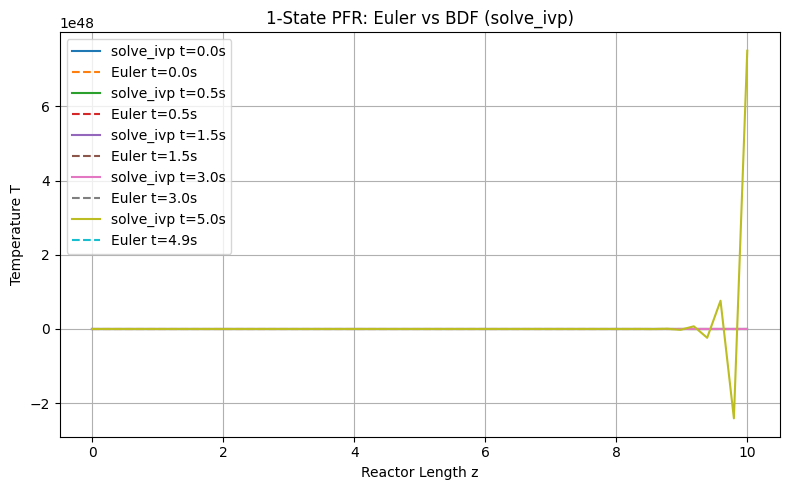

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.sparse import diags

# --- PFR 1-State Model ---
def PFR1(t, T, u, p):
    Nz = p["Nz"]
    dz = p["dz"]
    v = p["v"]
    DT = p["DT"]
    RT_fun = p.get("RT", lambda T: np.zeros_like(T))
    Tin_val = u(t)

    T_edge = np.concatenate([[Tin_val], T])
    NT = np.zeros(Nz + 1)
    for j in range(1, Nz + 1):
        NT[j] = v * T_edge[j - 1] - DT * (T_edge[j] - T_edge[j - 1]) / dz

    dTdt = -(NT[1:] - NT[:-1]) / dz + RT_fun(T)
    return dTdt

# --- Jacobian ---
def PFR1_Jac(t, T, u, p):
    Nz = p["Nz"]
    dz = p["dz"]
    v = p["v"]
    DT = p["DT"]

    main_diag = np.full(Nz, v / dz + 2 * DT / dz**2)
    upper_diag = np.full(Nz - 1, -DT / dz**2)
    lower_diag = np.full(Nz - 1, -DT / dz**2 - v / dz)

    J = diags([main_diag, upper_diag, lower_diag], [0, 1, -1], format='csr')
    return J

# --- Implicit Euler Function ---
def implicit_euler_fixed_pfr1(f, jac, t_span, y0, N, u, p):
    t0, tf = t_span
    dt = (tf - t0) / N
    T = np.zeros(N + 1)
    Y = np.zeros((N + 1, len(y0)))

    T[0] = t0
    Y[0] = y0.copy()
    maxit = 20
    tol = 1e-8

    for k in range(N):
        t_prev = T[k]
        y_prev = Y[k].copy()
        y_new = y_prev.copy()

        for _ in range(maxit):
            f_val = f(t_prev + dt, y_new, u, p)
            F = y_new - y_prev - dt * f_val
            if np.linalg.norm(F, np.inf) < tol:
                break
            J = jac(t_prev + dt, y_new, u, p)
            J_sys = np.eye(len(y0)) - dt * J.toarray()
            dy = np.linalg.solve(J_sys, -F)
            y_new += dy

        Y[k + 1] = y_new
        T[k + 1] = t_prev + dt

    return T, Y

# --- Parameters ---
params = {
    "Nz": 50,
    "dz": 0.2,
    "v": 3.0,
    "DT": 0.1,
    "RT": lambda T: 0.0 * T  # No reaction term
}

T0 = np.ones(params["Nz"]) * 300.0
Tin = lambda t: 350.0

# --- solve_ivp (BDF) ---
sol = solve_ivp(
    fun=lambda t, T: PFR1(t, T, Tin, params),
    jac=lambda t, T: PFR1_Jac(t, T, Tin, params),
    t_span=(0, 5),
    y0=T0,
    method='BDF',
    t_eval=np.linspace(0, 5, 100)
)

# --- Implicit Euler ---
N_steps = 100
T_euler, Y_euler = implicit_euler_fixed_pfr1(PFR1, PFR1_Jac, (0, 5), T0, N_steps, Tin, params)

# --- Plot both ---
z = np.linspace(0, params["Nz"] * params["dz"], params["Nz"])
time_indices = [0, 10, 30, 60, 99]

plt.figure(figsize=(8, 5))
for i in time_indices:
    plt.plot(z, sol.y[:, i], label=f'solve_ivp t={sol.t[i]:.1f}s', linestyle='-')
    plt.plot(z, Y_euler[i], label=f'Euler t={T_euler[i]:.1f}s', linestyle='--')

plt.xlabel("Reactor Length z")
plt.ylabel("Temperature T")
plt.title("1-State PFR: Euler vs BDF (solve_ivp)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


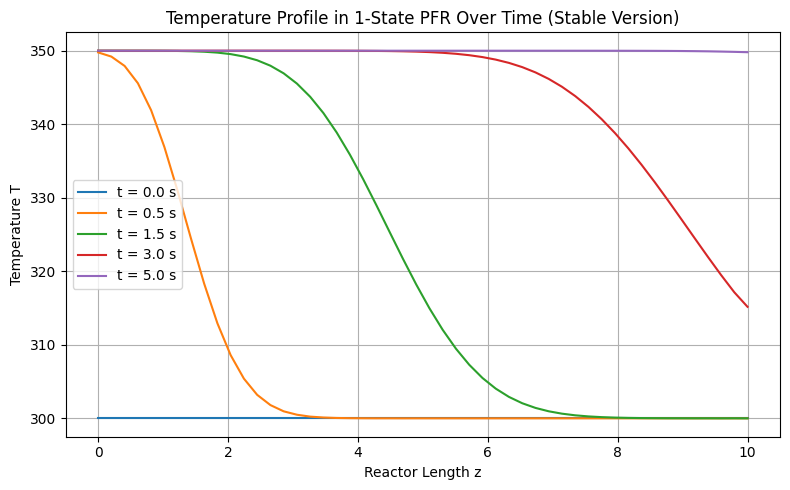

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.sparse import diags

# --- PFR Model (Stable Version) ---
def PFR1(t, T, u, p):
    Nz = p["Nz"]
    dz = p["dz"]
    v = p["v"]
    DT = p["DT"]
    RT_fun = p.get("RT", lambda T: np.zeros_like(T))

    Tin_val = u(t) if callable(u) else u

    NT = np.zeros(Nz + 1)
    NT[0] = v * Tin_val
    for j in range(1, Nz):
        NT[j] = v * T[j - 1] - DT * (T[j] - T[j - 1]) / dz
    NT[Nz] = v * T[-1]  # outlet convection only

    dTdt = -(NT[1:] - NT[:-1]) / dz + RT_fun(T)
    return dTdt

# --- Jacobian ---
def PFR1_Jac(t, T, u, p):
    Nz = p["Nz"]
    dz = p["dz"]
    v = p["v"]
    DT = p["DT"]

    main_diag = np.full(Nz, v / dz + 2 * DT / dz**2)
    upper_diag = np.full(Nz - 1, -DT / dz**2)
    lower_diag = np.full(Nz - 1, -DT / dz**2 - v / dz)

    J = diags([main_diag, upper_diag, lower_diag], [0, 1, -1], format='csr')
    return J

# --- Parameters ---
params = {
    "Nz": 50,
    "dz": 0.2,
    "v": 3.0,
    "DT": 0.1,
    "RT": lambda T: 0.0 * T
}

T0 = np.ones(params["Nz"]) * 300.0
Tin = 350.0  # constant inlet temperature

# --- Solve using BDF ---
sol = solve_ivp(
    fun=lambda t, T: PFR1(t, T, Tin, params),
    jac=lambda t, T: PFR1_Jac(t, T, Tin, params),
    t_span=(0, 5),
    y0=T0,
    method='BDF',
    t_eval=np.linspace(0, 5, 100)
)

# --- Plot ---
z = np.linspace(0, params["Nz"] * params["dz"], params["Nz"])
time_indices = [0, 10, 30, 60, 99]

plt.figure(figsize=(8, 5))
for i in time_indices:
    plt.plot(z, sol.y[:, i], label=f't = {sol.t[i]:.1f} s')

plt.xlabel("Reactor Length z")
plt.ylabel("Temperature T")
plt.title("Temperature Profile in 1-State PFR Over Time (Stable Version)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/q3/3rts4g613pv9wy5pq7tw8lkr0000gn/T/ipykernel_56977/3176648966.py:45: RuntimeWarning: invalid value encountered in multiply
  "RT": lambda T: 0.0 * T


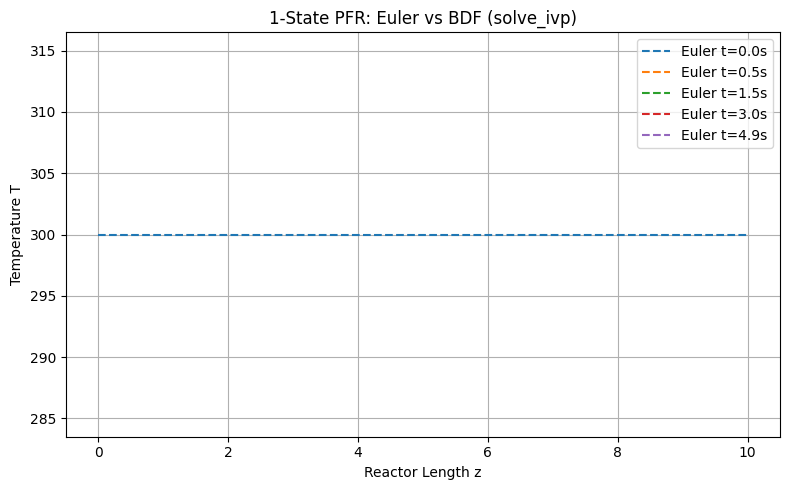

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# --- Implicit Euler Solver ---
def implicit_euler_fixed_pfr1(f, jac, t_span, T0, N, u, p):
    t0, tf = t_span
    dt = (tf - t0) / N
    T = np.zeros(N + 1)
    Y = np.zeros((N + 1, len(T0)))
    T[0], Y[0] = t0, T0

    tol = 1e-8
    maxit = 20

    for k in range(N):
        y_old = Y[k]
        y_new = y_old.copy()
        for _ in range(maxit):
            f_val = f(T[k + 1], y_new, u, p)
            F = y_new - y_old - dt * f_val
            if np.linalg.norm(F, np.inf) < tol:
                break
            J = jac(T[k + 1], y_new, u, p)
            dy = np.linalg.solve(np.eye(len(T0)) - dt * J.toarray(), -F)
            y_new += dy
        Y[k + 1] = y_new
        T[k + 1] = T[k] + dt

    return T, Y


# --- Setup ---
N_steps = 100
T0 = np.ones(params["Nz"]) * 300.0  # initial condition
T_euler, Y_euler = implicit_euler_fixed_pfr1(PFR1, PFR1_Jac, (0, 5), T0, N_steps, Tin, params)

# --- Plot Comparison ---
z = np.linspace(0, params["Nz"] * params["dz"], params["Nz"])
time_indices = [0, 10, 30, 60, 99]

plt.figure(figsize=(8, 5))
for i in time_indices:
    plt.plot(z, Y_euler[i], '--', label=f'Euler t={T_euler[i]:.1f}s')
    #plt.plot(z, sol.y[:, i], label=f'solve_ivp t={sol.t[i]:.1f}s')

plt.xlabel("Reactor Length z")
plt.ylabel("Temperature T")
plt.title("1-State PFR: Euler vs BDF (solve_ivp)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


1- state comparison

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# --- PFR1 Model ---
def PFR1(t, T, u, p):
    Nz = p["Nz"]
    dz = p["dz"]
    v = p["v"]
    DT = p["DT"]
    RT_fun = p.get("RT", lambda T: np.zeros_like(T))
    Tin_val = u if np.isscalar(u) else u(t)

    NT = np.zeros(Nz + 1)
    NT[0] = v * Tin_val
    for j in range(1, Nz):
        NT[j] = v * T[j - 1] - DT * (T[j] - T[j - 1]) / dz
    NT[Nz] = v * T[-1]

    dTdt = -(NT[1:] - NT[:-1]) / dz + RT_fun(T)
    return dTdt

# --- Fixed-step Implicit Euler ---
def implicit_euler_fixed_step(fun, t0, tf, x0, N, Cin, p):
    dt = (tf - t0) / N
    T = np.zeros(N + 1)
    X = np.zeros((N + 1, len(x0)))
    T[0], X[0] = t0, x0
    tol = 1e-8
    maxit = 20

    for k in range(N):
        x_old = X[k]
        x_new = x_old.copy()
        for _ in range(maxit):
            f_val = fun(T[k+1], x_new, Cin, p)
            F = x_new - x_old - dt * f_val
            if np.linalg.norm(F, np.inf) < tol:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x_new.copy()
                x_pert[i] += eps
                J[:, i] = (x_pert - x_new - dt * (fun(T[k+1], x_pert, Cin, p) - f_val)) / eps
            dx = np.linalg.solve(J, -F)
            x_new += dx
        X[k+1] = x_new
        T[k+1] = T[k] + dt

    return T, X

# --- Adaptive Implicit Euler ---
def implicit_euler_adaptive(fun, t0, tf, x0, h0, abstol, reltol, Cin, p):
    t, h = t0, h0
    x = x0.copy()
    T, X = [t], [x]
    maxit = 20
    tol_newton = 1e-8

    while t < tf:
        if t + h > tf:
            h = tf - t
        x_old = x
        for _ in range(maxit):
            f_val = fun(t + h, x, Cin, p)
            F = x - x_old - h * f_val
            if np.linalg.norm(F, np.inf) < tol_newton:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x.copy()
                x_pert[i] += eps
                f_pert = fun(t + h, x_pert, Cin, p)
                J[:, i] = (x_pert - x - h * (f_pert - f_val)) / eps
            dx = np.linalg.solve(J, -F)
            x += dx

        h_half = 0.5 * h
        x_half = x_old.copy()
        for _ in range(maxit):
            f_half = fun(t + h_half, x_half, Cin, p)
            Fh = x_half - x_old - h_half * f_half
            if np.linalg.norm(Fh, np.inf) < tol_newton:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x_half.copy()
                x_pert[i] += eps
                f_pert = fun(t + h_half, x_pert, Cin, p)
                J[:, i] = (x_pert - x_half - h_half * (f_pert - f_half)) / eps
            dx = np.linalg.solve(J, -Fh)
            x_half += dx

        x_hat = x_half.copy()
        for _ in range(maxit):
            f_last = fun(t + h, x_hat, Cin, p)
            Fhh = x_hat - x_half - h_half * f_last
            if np.linalg.norm(Fhh, np.inf) < tol_newton:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x_hat.copy()
                x_pert[i] += eps
                f_pert = fun(t + h, x_pert, Cin, p)
                J[:, i] = (x_pert - x_hat - h_half * (f_pert - f_last)) / eps
            dx = np.linalg.solve(J, -Fhh)
            x_hat += dx

        err = np.abs(x_hat - x)
        denom = abstol + reltol * np.maximum(np.abs(x_hat), np.abs(x))
        r = np.max(err / denom)

        if r <= 1:
            t += h
            x = x_hat.copy()
            T.append(t)
            X.append(x)
        h *= min(5, max(0.1, 0.9 * r ** -0.5))

    return np.array(T), np.array(X)

# --- Simulation Setup ---
params = {
    "Nz": 50,
    "dz": 0.2,
    "v": 3.0,
    "DT": 0.1,
    "RT": lambda T: 0.0 * T
}

params_adaptive = {
    "Nz": 50,
    "dz": 0.2,
    "v": 3.0,
    "DT": 0.1,
    "RT": lambda T: 0.0 * T
}
Nz = params["Nz"]
T0_fixed = np.ones(Nz) * 300.0
T0_adapt = np.ones(Nz) * 300.0

Tin = 350.0
tf = 5.0

# Run both solvers
#T_fixed, X_fixed = implicit_euler_fixed_step(PFR1, 0, tf, T0_fixed.copy(), N=200, Cin=Tin, p=params)
Tin = 350.0

T_adapt, X_adapt = implicit_euler_adaptive(PFR1, 0, tf, T0_adapt.copy(), h0=0.1, abstol=1e-6, reltol=1e-3, Cin=Tin, p=params_adaptive)

# Prepare for plot
z = np.linspace(0, Nz * params["dz"], Nz)
fixed_indices = [0, 40, 80, 120, 199]




/var/folders/q3/3rts4g613pv9wy5pq7tw8lkr0000gn/T/ipykernel_92225/1811627489.py:121: RuntimeWarning: divide by zero encountered in scalar power
  h *= min(5, max(0.1, 0.9 * r ** -0.5))


In [28]:
print("X_fixed[0][:5] =", X_fixed[0][:5])
print("X_adapt[0][:5] =", X_adapt[0][:5])
print("T0_fixed[:5]   =", T0_fixed[:5])

X_fixed[0][:5] = [300. 300. 300. 300. 300.]
X_adapt[0][:5] = [349.99999999 349.99999997 349.9999999  349.99999969 349.99999915]
T0_fixed[:5]   = [300. 300. 300. 300. 300.]


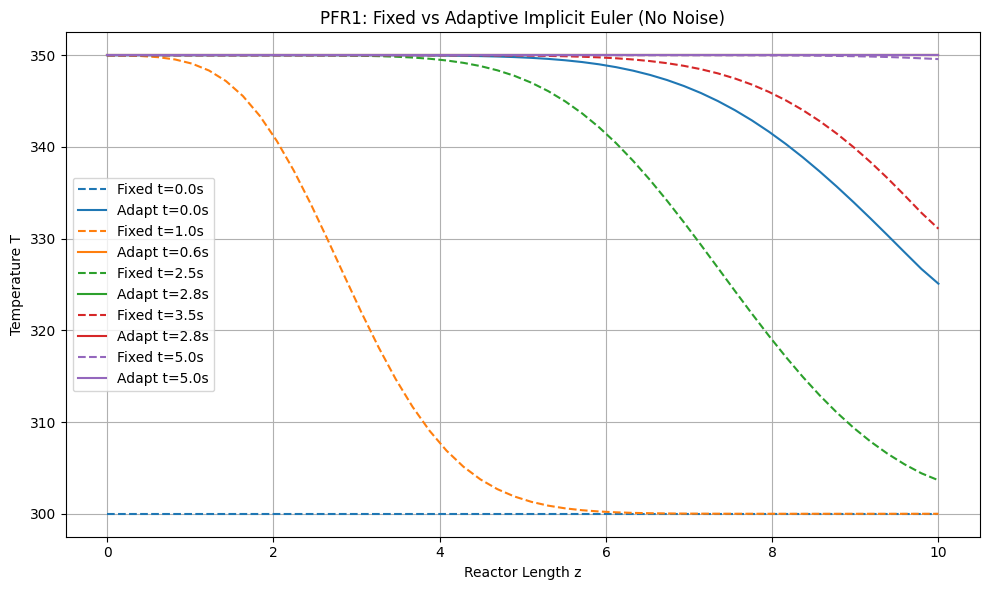

In [33]:
# Pick meaningful times across [0, tf]
target_times = [0.0, 1.0, 2.5, 3.5, 5.0]
adapt_indices = [np.argmin(np.abs(T_adapt - t)) for t in target_times]
fixed_indices = [np.argmin(np.abs(T_fixed - t)) for t in target_times]

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

plt.figure(figsize=(10, 6))
for i, (fi, ai) in enumerate(zip(fixed_indices, adapt_indices)):
    plt.plot(z, X_fixed[fi], linestyle="--", color=colors[i], label=f"Fixed t={T_fixed[fi]:.1f}s")
    plt.plot(z, X_adapt[ai], linestyle="-", color=colors[i], label=f"Adapt t={T_adapt[ai]:.1f}s")

plt.xlabel("Reactor Length z")
plt.ylabel("Temperature T")
plt.title("PFR1: Fixed vs Adaptive Implicit Euler (No Noise)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
# Create separate plots for adaptive solver only at selected target times
target_times = [0.0, 1.0, 2.5, 3.5, 5.0]

# Generate one plot per time point
for i, ai in enumerate(target_times):
    plt.figure(figsize=(7, 4))
    plt.plot(z, X_adapt[ai], color='tab:blue')
    plt.title(f"PFR1 Adaptive Implicit Euler\nTemperature Profile at t = {T_adapt[ai]:.1f}s")
    plt.xlabel("Reactor Length z")
    plt.ylabel("Temperature T")
    plt.grid(True)
    plt.ylim(300, 360)

    plt.tight_layout()
    plt.ticklabel_format(style='plain', axis='y')

    plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 700x400 with 0 Axes>

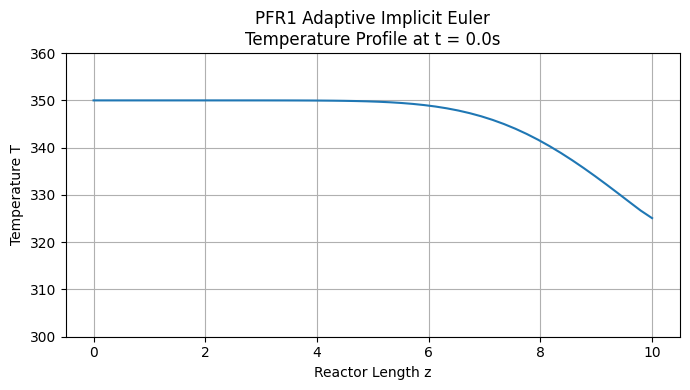

ValueError: 1.0 is not in list

In [20]:
target_times = [0.0, 1.0, 2.5, 3.5, 5.0]

for t in target_times:
    i = T_adapt.tolist().index(t)
    plt.figure(figsize=(7, 4))
    plt.plot(z, X_adapt[i], color='tab:blue')
    plt.title(f"PFR1 Adaptive Implicit Euler\nTemperature Profile at t = {T_adapt[i]:.1f}s")
    plt.xlabel("Reactor Length z")
    plt.ylabel("Temperature T")
    plt.grid(True)
    plt.ylim(300, 360)
    plt.tight_layout()
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()


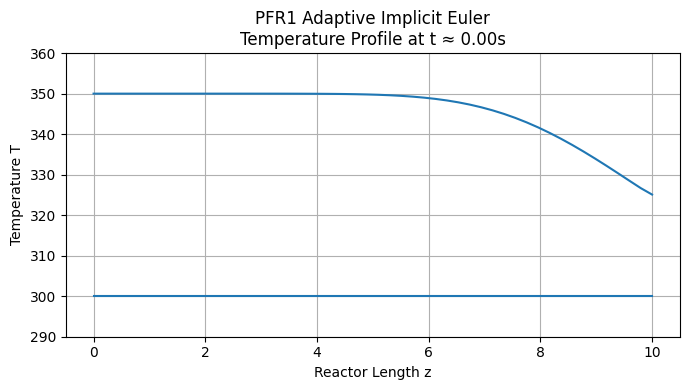

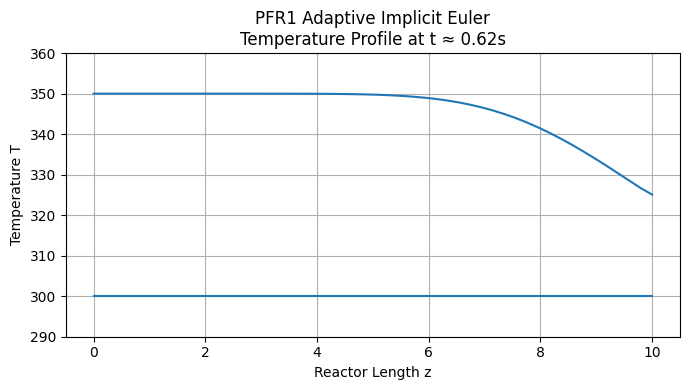

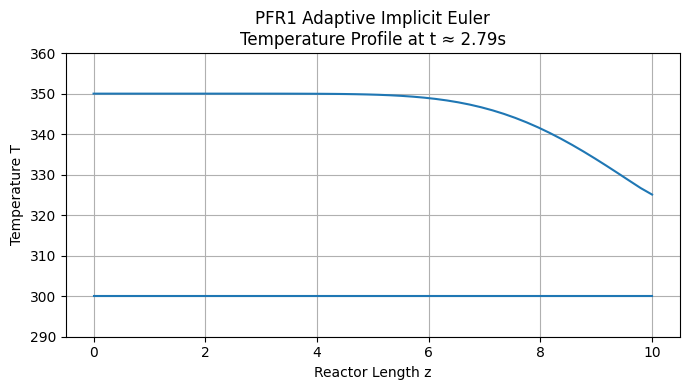

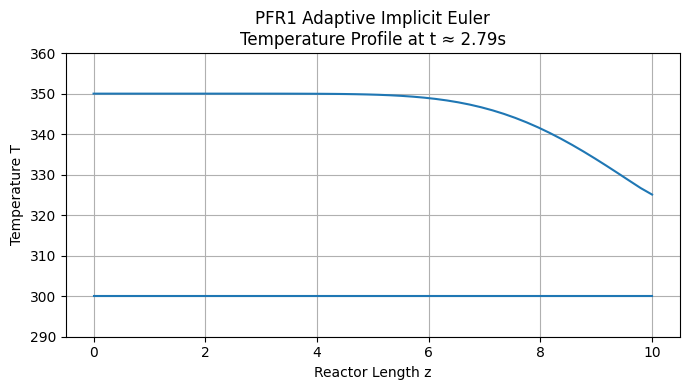

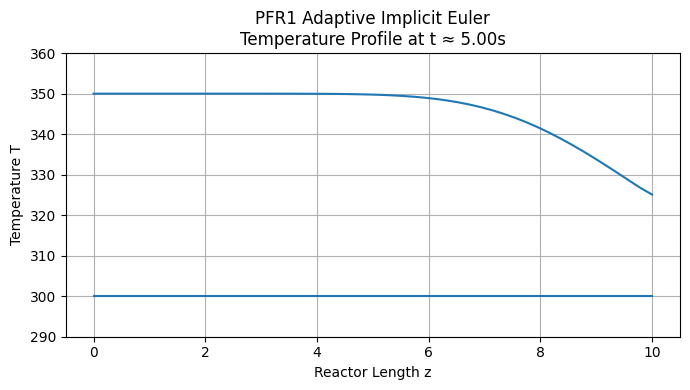

In [31]:
target_times = [0.0, 1.0, 2.5, 3.5, 5.0]

for t in target_times:
    i = np.argmin(np.abs(T_adapt - t))  # best match
    plt.figure(figsize=(7, 4))
    plt.plot(z, X_adapt[0], color='tab:blue')
    plt.plot(z, X_fixed[0], color='tab:blue')

    plt.title(f"PFR1 Adaptive Implicit Euler\nTemperature Profile at t ≈ {T_adapt[i]:.2f}s")
    plt.xlabel("Reactor Length z")
    plt.ylabel("Temperature T")
    plt.grid(True)
    plt.ylim(290, 360)
    plt.tight_layout()
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()


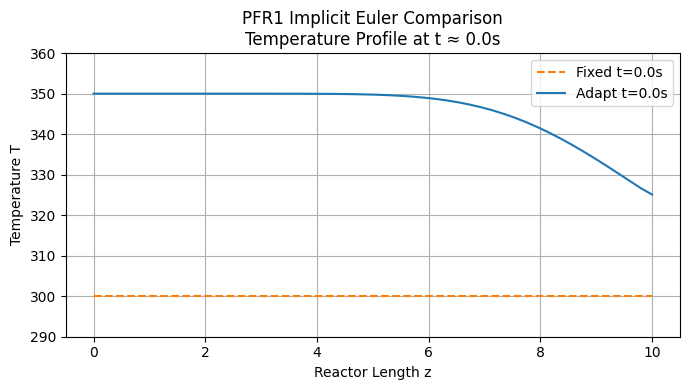

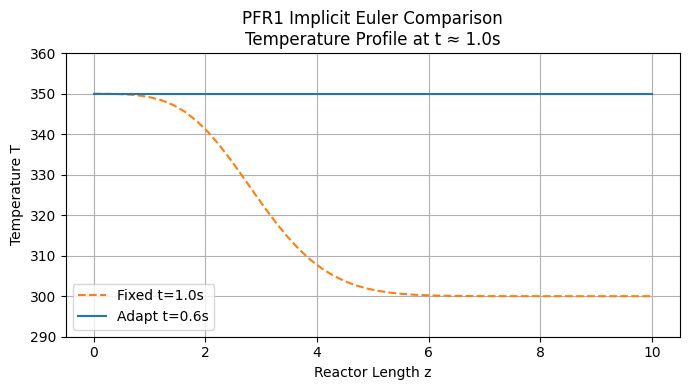

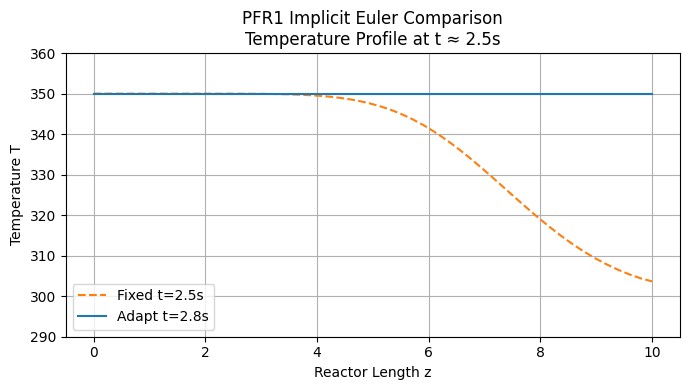

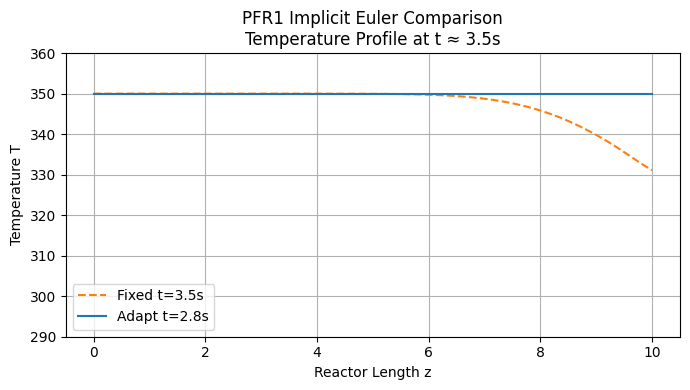

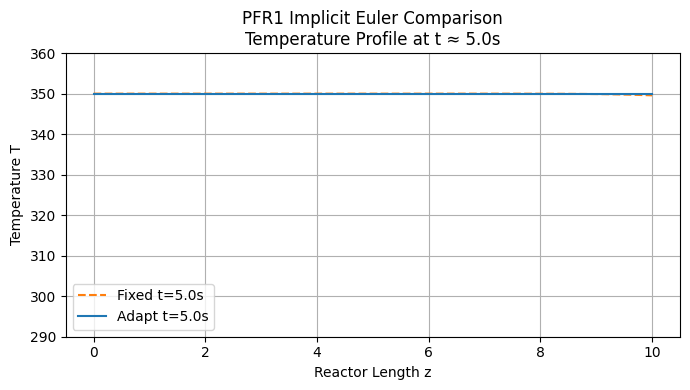

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define target times you want to examine
target_times = [0.0, 1.0, 2.5, 3.5, 5.0]

# Get indices in each time array closest to those targets
adapt_indices = [np.argmin(np.abs(T_adapt - t)) for t in target_times]
fixed_indices = [np.argmin(np.abs(T_fixed - t)) for t in target_times]

# Generate one plot per target time
for i, (ai, fi) in enumerate(zip(adapt_indices, fixed_indices)):
    plt.figure(figsize=(7, 4))
    
    # Plot fixed-step profile
    plt.plot(z, X_fixed[fi], linestyle="--", color='tab:orange',
             label=f"Fixed t={T_fixed[fi]:.1f}s")
    
    # Plot adaptive-step profile
    plt.plot(z, X_adapt[ai], linestyle="-", color='tab:blue',
             label=f"Adapt t={T_adapt[ai]:.1f}s")

    # Formatting
    plt.title(f"PFR1 Implicit Euler Comparison\nTemperature Profile at t ≈ {target_times[i]:.1f}s")
    plt.xlabel("Reactor Length z")
    plt.ylabel("Temperature T")
    plt.ylim(290, 360)
    plt.grid(True)
    plt.ticklabel_format(style='plain', axis='y')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [29]:
def implicit_euler_adaptive(fun, t0, tf, x0, h0, abstol, reltol, Cin, p):
    t, h = t0, h0
    x = x0.copy()  # work on a safe copy
    T, X = [t], [x.copy()]  # store a copy of initial condition
    maxit = 20
    tol_newton = 1e-8

    while t < tf:
        if t + h > tf:
            h = tf - t
        x_old = x
        for _ in range(maxit):
            f_val = fun(t + h, x, Cin, p)
            F = x - x_old - h * f_val
            if np.linalg.norm(F, np.inf) < tol_newton:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x.copy()
                x_pert[i] += eps
                f_pert = fun(t + h, x_pert, Cin, p)
                J[:, i] = (x_pert - x - h * (f_pert - f_val)) / eps
            dx = np.linalg.solve(J, -F)
            x += dx

        h_half = 0.5 * h
        x_half = x_old.copy()
        for _ in range(maxit):
            f_half = fun(t + h_half, x_half, Cin, p)
            Fh = x_half - x_old - h_half * f_half
            if np.linalg.norm(Fh, np.inf) < tol_newton:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x_half.copy()
                x_pert[i] += eps
                f_pert = fun(t + h_half, x_pert, Cin, p)
                J[:, i] = (x_pert - x_half - h_half * (f_pert - f_half)) / eps
            dx = np.linalg.solve(J, -Fh)
            x_half += dx

        x_hat = x_half.copy()
        for _ in range(maxit):
            f_last = fun(t + h, x_hat, Cin, p)
            Fhh = x_hat - x_half - h_half * f_last
            if np.linalg.norm(Fhh, np.inf) < tol_newton:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x_hat.copy()
                x_pert[i] += eps
                f_pert = fun(t + h, x_pert, Cin, p)
                J[:, i] = (x_pert - x_hat - h_half * (f_pert - f_last)) / eps
            dx = np.linalg.solve(J, -Fhh)
            x_hat += dx

        err = np.abs(x_hat - x)
        denom = abstol + reltol * np.maximum(np.abs(x_hat), np.abs(x))
        r = np.max(err / denom)

        if r <= 1:
            t += h
            x = x_hat.copy()
            T.append(t)
            X.append(x.copy())  # store a copy at each step
        h *= min(5, max(0.1, 0.9 * r ** -0.5))

    return np.array(T), np.array(X)


here we go again

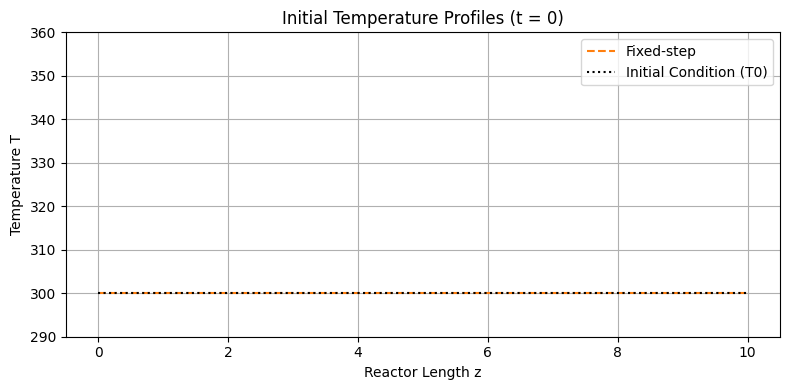

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# --- Corrected Adaptive Solver ---
def implicit_euler_adaptive(fun, t0, tf, x0, h0, abstol, reltol, Cin, p):
    t, h = t0, h0
    x_init = x0.copy()
    x = x0.copy()
    T, X = [t], [x_init]  # store initial state safely
    maxit = 20
    tol_newton = 1e-8

    while t < tf:
        if t + h > tf:
            h = tf - t
        x_old = x.copy()
        for _ in range(maxit):
            f_val = fun(t + h, x, Cin, p)
            F = x - x_old - h * f_val
            if np.linalg.norm(F, np.inf) < tol_newton:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x.copy()
                x_pert[i] += eps
                f_pert = fun(t + h, x_pert, Cin, p)
                J[:, i] = (x_pert - x - h * (f_pert - f_val)) / eps
            dx = np.linalg.solve(J, -F)
            x += dx

        h_half = 0.5 * h
        x_half = x_old.copy()
        for _ in range(maxit):
            f_half = fun(t + h_half, x_half, Cin, p)
            Fh = x_half - x_old - h_half * f_half
            if np.linalg.norm(Fh, np.inf) < tol_newton:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x_half.copy()
                x_pert[i] += eps
                f_pert = fun(t + h_half, x_pert, Cin, p)
                J[:, i] = (x_pert - x_half - h_half * (f_pert - f_half)) / eps
            dx = np.linalg.solve(J, -Fh)
            x_half += dx

        x_hat = x_half.copy()
        for _ in range(maxit):
            f_last = fun(t + h, x_hat, Cin, p)
            Fhh = x_hat - x_half - h_half * f_last
            if np.linalg.norm(Fhh, np.inf) < tol_newton:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x_hat.copy()
                x_pert[i] += eps
                f_pert = fun(t + h, x_pert, Cin, p)
                J[:, i] = (x_pert - x_hat - h_half * (f_pert - f_last)) / eps
            dx = np.linalg.solve(J, -Fhh)
            x_hat += dx

        err = np.abs(x_hat - x)
        denom = abstol + reltol * np.maximum(np.abs(x_hat), np.abs(x))
        r = np.max(err / denom)

        if r <= 1:
            t += h
            x = x_hat.copy()
            T.append(t)
            X.append(x.copy())
        h *= min(5, max(0.1, 0.9 * r ** -0.5))

    return np.array(T), np.array(X)

# --- Fixed-step Implicit Euler ---
def implicit_euler_fixed_step(fun, t0, tf, x0, N, Cin, p):
    dt = (tf - t0) / N
    T = np.zeros(N + 1)
    X = np.zeros((N + 1, len(x0)))
    T[0], X[0] = t0, x0
    tol = 1e-8
    maxit = 20

    for k in range(N):
        x_old = X[k]
        x_new = x_old.copy()
        for _ in range(maxit):
            f_val = fun(T[k+1], x_new, Cin, p)
            F = x_new - x_old - dt * f_val
            if np.linalg.norm(F, np.inf) < tol:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x_new.copy()
                x_pert[i] += eps
                J[:, i] = (x_pert - x_new - dt * (fun(T[k+1], x_pert, Cin, p) - f_val)) / eps
            dx = np.linalg.solve(J, -F)
            x_new += dx
        X[k+1] = x_new
        T[k+1] = T[k] + dt

    return T, X

# --- PFR1 model ---
def PFR1(t, T, u, p):
    Nz = p["Nz"]
    dz = p["dz"]
    v = p["v"]
    DT = p["DT"]
    RT_fun = p.get("RT", lambda T: np.zeros_like(T))
    Tin_val = u if np.isscalar(u) else u(t)

    NT = np.zeros(Nz + 1)
    NT[0] = v * Tin_val
    for j in range(1, Nz):
        NT[j] = v * T[j - 1] - DT * (T[j] - T[j - 1]) / dz
    NT[Nz] = v * T[-1]

    dTdt = -(NT[1:] - NT[:-1]) / dz + RT_fun(T)
    return dTdt

# --- Simulation Parameters ---
params = {
    "Nz": 50,
    "dz": 0.2,
    "v": 3.0,
    "DT": 0.1,
    "RT": lambda T: 0.0 * T
}
Nz = params["Nz"]
z = np.linspace(0, Nz * params["dz"], Nz)
T0 = np.ones(Nz) * 300.0
Tin = 350.0
tf = 5.0

# Run both solvers
T_fixed, X_fixed = implicit_euler_fixed_step(PFR1, 0, tf, T0.copy(), N=200, Cin=Tin, p=params)
T_adapt, X_adapt = implicit_euler_adaptive(PFR1, 0, tf, T0.copy(), h0=0.1, abstol=1e-6, reltol=1e-3, Cin=Tin, p=params)

# --- Plot to confirm matching initial state ---
plt.figure(figsize=(8, 4))
plt.plot(z, X_fixed[0], label="Fixed-step", linestyle='--', color='tab:orange')
#plt.plot(z, X_adapt[0], label="Adaptive-step", linestyle='-', color='tab:blue')
plt.plot(z, T0, label="Initial Condition (T0)", linestyle=':', color='black')

plt.title("Initial Temperature Profiles (t = 0)")
plt.xlabel("Reactor Length z")
plt.ylabel("Temperature T")
plt.ylim(290, 360)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


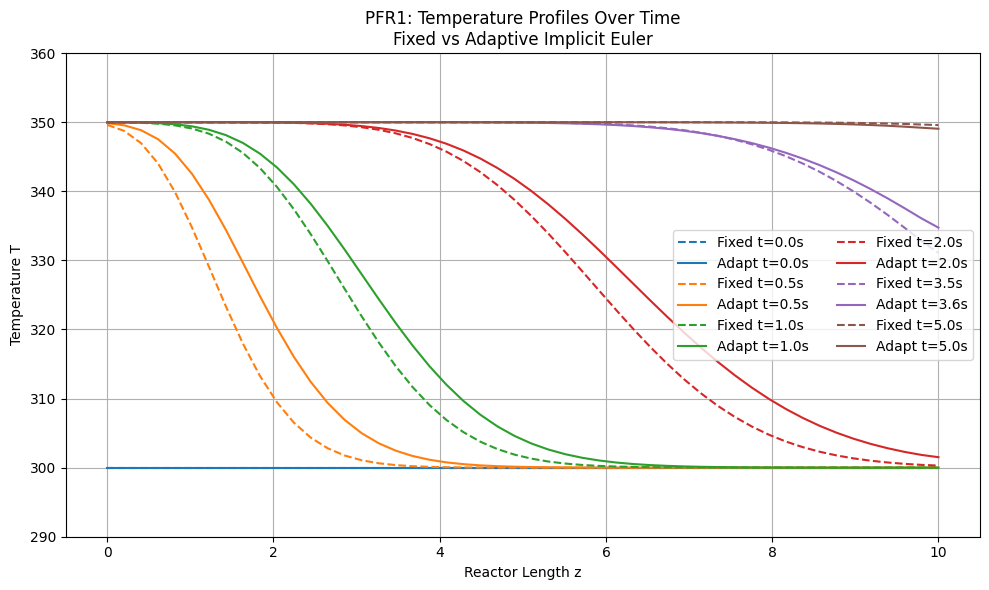

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# --- Time points for comparison ---
comparison_times = [0.0, 0.5, 1.0, 2.0, 3.5, 5.0]

# --- Find closest time indices in each solver ---
adapt_indices = [np.argmin(np.abs(T_adapt - t)) for t in comparison_times]
fixed_indices = [np.argmin(np.abs(T_fixed - t)) for t in comparison_times]

# --- Plot: fixed vs adaptive at selected times ---
plt.figure(figsize=(10, 6))
for i, (ai, fi) in enumerate(zip(adapt_indices, fixed_indices)):
    plt.plot(z, X_fixed[fi], linestyle='--', label=f"Fixed t={T_fixed[fi]:.1f}s", color=f"C{i}")
    plt.plot(z, X_adapt[ai], linestyle='-', label=f"Adapt t={T_adapt[ai]:.1f}s", color=f"C{i}")

plt.title("PFR1: Temperature Profiles Over Time\nFixed vs Adaptive Implicit Euler")
plt.xlabel("Reactor Length z")
plt.ylabel("Temperature T")
plt.ylim(290, 360)
plt.grid(True)
plt.legend(ncol=2)
plt.tight_layout()
plt.show()


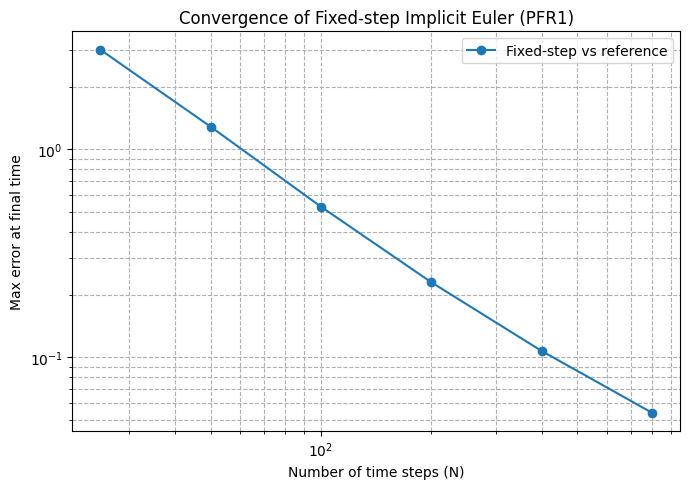

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# --- Reference solution (adaptive with tight tolerances) ---
T_ref, X_ref = implicit_euler_adaptive(
    PFR1, 0, tf, T0.copy(),
    h0=0.01, abstol=1e-8, reltol=1e-8,
    Cin=Tin, p=params
)
X_ref_final = X_ref[-1]

# --- Fixed-step simulations with increasing resolution ---
N_values = [25, 50, 100, 200, 400, 800]
errors = []

for N in N_values:
    T_test, X_test = implicit_euler_fixed_step(PFR1, 0, tf, T0.copy(), N=N, Cin=Tin, p=params)
    max_error = np.max(np.abs(X_test[-1] - X_ref_final))
    errors.append(max_error)

# --- Convergence plot ---
plt.figure(figsize=(7, 5))
plt.loglog(N_values, errors, marker='o', label="Fixed-step vs reference")
plt.xlabel("Number of time steps (N)")
plt.ylabel("Max error at final time")
plt.title("Convergence of Fixed-step Implicit Euler (PFR1)")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()


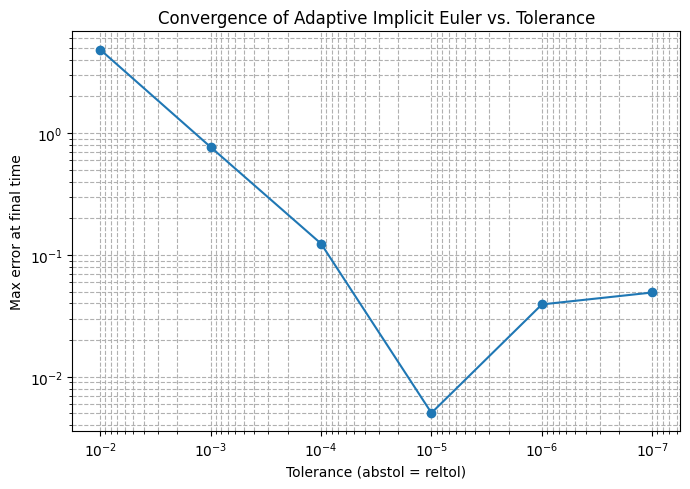

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# --- Define tolerances to test ---
tolerances = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
errors = []

# --- Reference solution (tightest tolerance) ---
T_ref, X_ref = implicit_euler_adaptive(
    PFR1, 0, tf, T0.copy(),
    h0=0.01, abstol=1e-10, reltol=1e-10,
    Cin=Tin, p=params
)
X_ref_final = X_ref[-1]

# --- Loop over tolerances ---
for tol in tolerances:
    T_adapt, X_adapt = implicit_euler_adaptive(
        PFR1, 0, tf, T0.copy(),
        h0=0.1, abstol=tol, reltol=tol,
        Cin=Tin, p=params
    )
    err = np.max(np.abs(X_adapt[-1] - X_ref_final))
    errors.append(err)

# --- Plot convergence ---
plt.figure(figsize=(7, 5))
plt.loglog(tolerances, errors, marker='o')
plt.xlabel("Tolerance (abstol = reltol)")
plt.ylabel("Max error at final time")
plt.title("Convergence of Adaptive Implicit Euler vs. Tolerance")
plt.grid(True, which="both", ls="--")
plt.gca().invert_xaxis()  # smaller tolerance = left
plt.tight_layout()
plt.show()


Do we want to include the plot from above? Chat gbt has a good asnwer to that

# 3 state with jacobi

In [39]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.sparse import diags, bmat
import matplotlib.pyplot as plt

def PFR_3state(t, C, Cin, p):
    CAin, CBin, Tin = Cin
    n, dz, v, F = p['Nz'], p['dz'], p['v'], p['F']
    k0, DA, DB, DT = np.exp(24.6), 0.1, 0.1, 0.1
    Ea_over_R = 8500

    CA = C[:n]
    CB = C[n:2*n]
    T = C[2*n:3*n]

    k = k0 * np.exp(-Ea_over_R / T)
    r = k * CA * CB

    dCA_dt = DA * (np.roll(CA, -1) - 2 * CA + np.roll(CA, 1)) / dz**2 - v[0] * r
    dCB_dt = DB * (np.roll(CB, -1) - 2 * CB + np.roll(CB, 1)) / dz**2 - v[1] * r
    dT_dt = DT * (np.roll(T, -1) - 2 * T + np.roll(T, 1)) / dz**2 - v[2] * r

    dCA_dt[0] = (Cin[0] - CA[0]) * F
    dCB_dt[0] = (Cin[1] - CB[0]) * F
    dT_dt[0] = (Cin[2] - T[0]) * F

    return np.concatenate([dCA_dt, dCB_dt, dT_dt])

def jacobian_PFR_3state(t, C, Cin, p):
    CAin, CBin, Tin = Cin
    n, dz, v, F = p['Nz'], p['dz'], p['v'], p['F']
    k0, DA, DB, DT = np.exp(24.6), 0.1, 0.1, 0.1
    Ea_over_R = 8500

    CA = C[:n]
    CB = C[n:2*n]
    T = C[2*n:3*n]

    k = k0 * np.exp(-Ea_over_R / T)
    r = k * CA * CB
    dr_dCA = k * CB
    dr_dCB = k * CA
    dr_dT = k * CA * CB * Ea_over_R / T**2

    dRA_dCA = v[0] * dr_dCA
    dRA_dCB = v[0] * dr_dCB
    dRA_dT = v[0] * dr_dT

    dRB_dCA = v[1] * dr_dCA
    dRB_dCB = v[1] * dr_dCB
    dRB_dT = v[1] * dr_dT

    dRT_dCA = v[2] * dr_dCA
    dRT_dCB = v[2] * dr_dCB
    dRT_dT = v[2] * dr_dT

    def spatial_matrix(D):
        main = (-2 * D) / dz**2 * np.ones(n)
        off = (D) / dz**2 * np.ones(n - 1)
        return diags([off, main, off], offsets=[-1, 0, 1], format='csr')

    JAA = spatial_matrix(DA) + diags(dRA_dCA)
    JAB = diags(dRA_dCB)
    JAT = diags(dRA_dT)

    JBA = diags(dRB_dCA)
    JBB = spatial_matrix(DB) + diags(dRB_dCB)
    JBT = diags(dRB_dT)

    JTA = diags(dRT_dCA)
    JTB = diags(dRT_dCB)
    JTT = spatial_matrix(DT) + diags(dRT_dT)

    return bmat([[JAA, JAB, JAT], [JBA, JBB, JBT], [JTA, JTB, JTT]], format='csr')

def implicit_euler_fixed_step(fun, t0, tf, x0, N, Cin, p):
    dt = (tf - t0) / N
    T = np.zeros(N + 1)
    X = np.zeros((N + 1, len(x0)))
    T[0], X[0] = t0, x0
    tol = 1e-8
    maxit = 20

    for k in range(N):
        x_old = X[k]
        x_new = x_old.copy()
        for _ in range(maxit):
            f_val = fun(T[k+1], x_new, Cin, p)
            F = x_new - x_old - dt * f_val
            if np.linalg.norm(F, np.inf) < tol:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x_new.copy()
                x_pert[i] += eps
                J[:, i] = (x_pert - x_new - dt * (fun(T[k+1], x_pert, Cin, p) - f_val)) / eps
            dx = np.linalg.solve(J, -F)
            x_new += dx
        X[k+1] = x_new
        T[k+1] = T[k] + dt

    return T, X

def implicit_euler_adaptive(fun, t0, tf, x0, h0, abstol, reltol, Cin, p):
    t, h = t0, h0
    x = x0.copy()
    T, X = [t], [x.copy()]
    maxit = 20
    tol_newton = 1e-8

    while t < tf:
        if t + h > tf:
            h = tf - t
        x_old = x.copy()

        for _ in range(maxit):
            f_val = fun(t + h, x, Cin, p)
            F = x - x_old - h * f_val
            if np.linalg.norm(F, np.inf) < tol_newton:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x.copy()
                x_pert[i] += eps
                f_pert = fun(t + h, x_pert, Cin, p)
                J[:, i] = (x_pert - x - h * (f_pert - f_val)) / eps
            dx = np.linalg.solve(J, -F)
            x += dx

        h_half = 0.5 * h
        x_half = x_old.copy()
        for _ in range(maxit):
            f_half = fun(t + h_half, x_half, Cin, p)
            Fh = x_half - x_old - h_half * f_half
            if np.linalg.norm(Fh, np.inf) < tol_newton:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x_half.copy()
                x_pert[i] += eps
                f_pert = fun(t + h_half, x_pert, Cin, p)
                J[:, i] = (x_pert - x_half - h_half * (f_pert - f_half)) / eps
            dx = np.linalg.solve(J, -Fh)
            x_half += dx

        x_hat = x_half.copy()
        for _ in range(maxit):
            f_last = fun(t + h, x_hat, Cin, p)
            Fhh = x_hat - x_half - h_half * f_last
            if np.linalg.norm(Fhh, np.inf) < tol_newton:
                break
            J = np.eye(len(x0))
            eps = 1e-6
            for i in range(len(x0)):
                x_pert = x_hat.copy()
                x_pert[i] += eps
                f_pert = fun(t + h, x_pert, Cin, p)
                J[:, i] = (x_pert - x_hat - h_half * (f_pert - f_last)) / eps
            dx = np.linalg.solve(J, -Fhh)
            x_hat += dx

        err = np.abs(x_hat - x)
        denom = abstol + reltol * np.maximum(np.abs(x_hat), np.abs(x))
        r = np.max(err / denom)

        if r <= 1:
            t += h
            x = x_hat.copy()
            T.append(t)
            X.append(x.copy())
        h *= min(5, max(0.1, 0.9 * r ** -0.5))

    return np.array(T), np.array(X)

# Problem setup
Nz = 50
L = 1.0
dz = L / (Nz - 1)
v = [1.0, 1.0, 1.0]
F = 1.0
p = {'Nz': Nz, 'dz': dz, 'v': v, 'F': F}
Cin = [1.0, 1.0, 400.0]
C0 = np.tile(Cin, Nz)
tspan = (0, 10)

# Solve with each method
sol_ivp = solve_ivp(PFR_3state, tspan, C0, args=(Cin, p), method='BDF', jac=jacobian_PFR_3state)
T_fixed, X_fixed = implicit_euler_fixed_step(PFR_3state, tspan[0], tspan[1], C0, N=100, Cin=Cin, p=p)
T_adapt, X_adapt = implicit_euler_adaptive(PFR_3state, tspan[0], tspan[1], C0, h0=0.1, abstol=1e-4, reltol=1e-4, Cin=Cin, p=p)


In [41]:
def implicit_euler_fixed_step(fun, jac, t0, tf, x0, N, Cin, p):
    dt = (tf - t0) / N
    T = np.zeros(N + 1)
    X = np.zeros((N + 1, len(x0)))
    T[0], X[0] = t0, x0
    tol = 1e-8
    maxit = 20

    for k in range(N):
        x_old = X[k]
        x_new = x_old.copy()
        for _ in range(maxit):
            f_val = fun(T[k+1], x_new, Cin, p)
            F = x_new - x_old - dt * f_val
            if np.linalg.norm(F, np.inf) < tol:
                break
            J = np.eye(len(x0)) - dt * jac(T[k+1], x_new, Cin, p).toarray()
            dx = np.linalg.solve(J, -F)
            x_new += dx
        X[k+1] = x_new
        T[k+1] = T[k] + dt

    return T, X

def implicit_euler_adaptive(fun, jac, t0, tf, x0, h0, abstol, reltol, Cin, p):
    t, h = t0, h0
    x = x0.copy()
    T, X = [t], [x.copy()]
    maxit = 20
    tol_newton = 1e-8

    while t < tf:
        if t + h > tf:
            h = tf - t
        x_old = x.copy()

        # Full step
        for _ in range(maxit):
            f_val = fun(t + h, x, Cin, p)
            F = x - x_old - h * f_val
            if np.linalg.norm(F, np.inf) < tol_newton:
                break
            J = np.eye(len(x0)) - h * jac(t + h, x, Cin, p).toarray()
            dx = np.linalg.solve(J, -F)
            x += dx

        # Half step 1
        h_half = 0.5 * h
        x_half = x_old.copy()
        for _ in range(maxit):
            f_half = fun(t + h_half, x_half, Cin, p)
            Fh = x_half - x_old - h_half * f_half
            if np.linalg.norm(Fh, np.inf) < tol_newton:
                break
            J_half = np.eye(len(x0)) - h_half * jac(t + h_half, x_half, Cin, p).toarray()
            dx = np.linalg.solve(J_half, -Fh)
            x_half += dx

        # Half step 2
        x_hat = x_half.copy()
        for _ in range(maxit):
            f_last = fun(t + h, x_hat, Cin, p)
            Fhh = x_hat - x_half - h_half * f_last
            if np.linalg.norm(Fhh, np.inf) < tol_newton:
                break
            J_half = np.eye(len(x0)) - h_half * jac(t + h, x_hat, Cin, p).toarray()
            dx = np.linalg.solve(J_half, -Fhh)
            x_hat += dx

        # Error control
        err = np.abs(x_hat - x)
        denom = abstol + reltol * np.maximum(np.abs(x_hat), np.abs(x))
        r = np.max(err / denom)

        if r <= 1:
            t += h
            x = x_hat.copy()
            T.append(t)
            X.append(x.copy())
        h *= min(5, max(0.1, 0.9 * r ** -0.5))

    return np.array(T), np.array(X)


In [42]:
T_fixed, X_fixed = implicit_euler_fixed_step(PFR_3state, jacobian_PFR_3state, tspan[0], tspan[1], C0, N=100, Cin=Cin, p=p)
T_adapt, X_adapt = implicit_euler_adaptive(PFR_3state, jacobian_PFR_3state, tspan[0], tspan[1], C0, h0=0.1, abstol=1e-4, reltol=1e-4, Cin=Cin, p=p)


/var/folders/q3/3rts4g613pv9wy5pq7tw8lkr0000gn/T/ipykernel_92225/2246669653.py:16: RuntimeWarning: overflow encountered in exp
  k = k0 * np.exp(-Ea_over_R / T)
/var/folders/q3/3rts4g613pv9wy5pq7tw8lkr0000gn/T/ipykernel_92225/2246669653.py:39: RuntimeWarning: overflow encountered in exp
  k = k0 * np.exp(-Ea_over_R / T)
/var/folders/q3/3rts4g613pv9wy5pq7tw8lkr0000gn/T/ipykernel_92225/2246669653.py:17: RuntimeWarning: overflow encountered in multiply
  r = k * CA * CB
/var/folders/q3/3rts4g613pv9wy5pq7tw8lkr0000gn/T/ipykernel_92225/2246669653.py:40: RuntimeWarning: overflow encountered in multiply
  r = k * CA * CB
/var/folders/q3/3rts4g613pv9wy5pq7tw8lkr0000gn/T/ipykernel_92225/2246669653.py:43: RuntimeWarning: overflow encountered in multiply
  dr_dT = k * CA * CB * Ea_over_R / T**2
/var/folders/q3/3rts4g613pv9wy5pq7tw8lkr0000gn/T/ipykernel_92225/2246669653.py:43: RuntimeWarning: overflow encountered in square
  dr_dT = k * CA * CB * Ea_over_R / T**2
/var/folders/q3/3rts4g613pv9wy5pq7

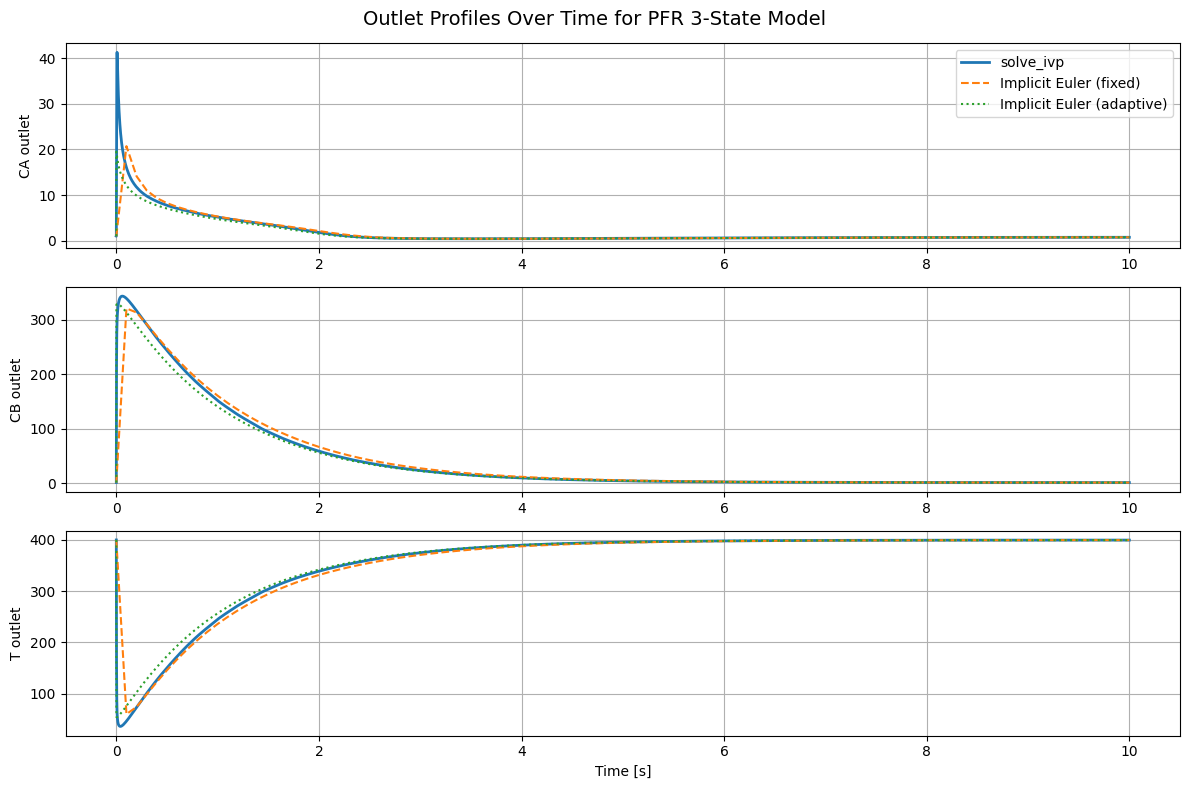

In [40]:
import matplotlib.pyplot as plt

def plot_outlet_profiles(sol_ivp, T_fixed, X_fixed, T_adapt, X_adapt, Nz):
    plt.figure(figsize=(12, 8))

    # Outlet index
    i_outlet = Nz - 1

    # Plot CA outlet
    plt.subplot(3, 1, 1)
    plt.plot(sol_ivp.t, sol_ivp.y[i_outlet], label="solve_ivp", lw=2)
    plt.plot(T_fixed, X_fixed[:, i_outlet], '--', label="Implicit Euler (fixed)", lw=1.5)
    plt.plot(T_adapt, X_adapt[:, i_outlet], ':', label="Implicit Euler (adaptive)", lw=1.5)
    plt.ylabel("CA outlet")
    plt.grid(True)
    plt.legend()

    # Plot CB outlet
    plt.subplot(3, 1, 2)
    plt.plot(sol_ivp.t, sol_ivp.y[Nz + i_outlet], label="solve_ivp", lw=2)
    plt.plot(T_fixed, X_fixed[:, Nz + i_outlet], '--', label="Implicit Euler (fixed)", lw=1.5)
    plt.plot(T_adapt, X_adapt[:, Nz + i_outlet], ':', label="Implicit Euler (adaptive)", lw=1.5)
    plt.ylabel("CB outlet")
    plt.grid(True)

    # Plot T outlet
    plt.subplot(3, 1, 3)
    plt.plot(sol_ivp.t, sol_ivp.y[2 * Nz + i_outlet], label="solve_ivp", lw=2)
    plt.plot(T_fixed, X_fixed[:, 2 * Nz + i_outlet], '--', label="Implicit Euler (fixed)", lw=1.5)
    plt.plot(T_adapt, X_adapt[:, 2 * Nz + i_outlet], ':', label="Implicit Euler (adaptive)", lw=1.5)
    plt.ylabel("T outlet")
    plt.xlabel("Time [s]")
    plt.grid(True)

    plt.suptitle("Outlet Profiles Over Time for PFR 3-State Model", fontsize=14)
    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_outlet_profiles(sol_ivp, T_fixed, X_fixed, T_adapt, X_adapt, Nz)


In [ ]:
z = np.linspace(0, L, Nz)
time_indices = np.linspace(0, N, 5, dtype=int)
state_labels = ['CA', 'CB', 'T']

fig, axs = plt.subplots(3, 1, figsize=(9, 10), sharex=True)

for i, ax in enumerate(axs):
    for idx in time_indices:
        CA = mean_path[0:Nz, idx]
        CB = mean_path[Nz:2*Nz, idx]
        T_ = mean_path[2*Nz:, idx]
        std_CA = std_path[0:Nz, idx]
        std_CB = std_path[Nz:2*Nz, idx]
        std_T  = std_path[2*Nz:, idx]

        ax_idx = [CA, CB, T_][i]
        std_idx = [std_CA, std_CB, std_T][i]

        ax.plot(z, ax_idx, label=f't = {T[idx]:.3f}s')
        ax.fill_between(z, ax_idx - std_idx, ax_idx + std_idx, alpha=0.2)

    ax.set_ylabel(state_labels[i])
    ax.grid(True)
    ax.legend()

axs[2].set_xlabel('Reactor Length (z)')
fig.suptitle('PFR (Nz = 20): Mean ± Std from Additive Noise (Explicit-Explicit)')
plt.tight_layout()
plt.show()